In [133]:
!pip install opencv-python
!pip install albumentations

import pandas as pd
import math, random
import torch
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
import sklearn
import shutil
import seaborn as sns
import os
import json 
import cv2
import albumentations as albu

from pathlib import Path
from torch.utils.data import DataLoader, Dataset, random_split
from torch.utils.data import random_split
from torch.nn import init
from matplotlib import pyplot as plt
from matplotlib.mlab import window_hanning, specgram
from matplotlib.colors import LogNorm
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
from torchsummary import summary as summary

Looking in indexes: http://ftp.daumkakao.com/pypi/simple
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Looking in indexes: http://ftp.daumkakao.com/pypi/simple
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [142]:
import os
print('=====================================')
print('============= For Train =============')
print('=====================================')
for dirname, _, filenames in os.walk('/mnt/dataset'):
    print('=====================================')
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
print('=====================================')
print('=========== For Inference ===========')
print('=====================================')        
for dirname2, _, filenames2 in os.walk('/mnt/VOICE/dataset'):
    print('=====================================')
    for filename2 in filenames2:
        print(os.path.join(dirname2, filename2))

============= For Train =============
/mnt/dataset/answer_format.csv
/mnt/dataset/images/data892.png
/mnt/dataset/images/data658.png
/mnt/dataset/images/data102.png
/mnt/dataset/images/data496.png
/mnt/dataset/images/data021.png
/mnt/dataset/images/data379.png
/mnt/dataset/images/data694.png
/mnt/dataset/images/data300.png
/mnt/dataset/images/data775.png
/mnt/dataset/images/data199.png
/mnt/dataset/images/data120.png
/mnt/dataset/images/data838.png
/mnt/dataset/images/data201.png
/mnt/dataset/images/data478.png
/mnt/dataset/images/data003.png
/mnt/dataset/images/data559.png
/mnt/dataset/images/data874.png
/mnt/dataset/images/data793.png
/mnt/dataset/images/data667.png
/mnt/dataset/images/data748.png
/mnt/dataset/images/data030.png
/mnt/dataset/images/data469.png
/mnt/dataset/images/data784.png
/mnt/dataset/images/data289.png
/mnt/dataset/images/data847.png
/mnt/dataset/images/data210.png
/mnt/dataset/images/data649.png
/mnt/dataset/images/data012.png
/mnt/dataset/images/data568.png
/mn



=========== train_data_num(Used) ===========
   num
0  807
1  483
2  087
3  249
4  681
(639, 1)


=========== train_data_ID (Used) ===========
[5. 0. 2. 4. 0. 5. 5. 0. 0. 0. 0. 2. 0. 5. 0. 0. 0. 5. 0. 0. 2. 2. 0. 5.
 5. 0. 0. 3. 0. 0. 5. 0. 0. 4. 0. 0. 3. 5. 2. 0. 0. 0. 0. 1. 3. 0. 4. 0.
 2. 4. 0. 2. 1. 0. 3. 5. 2. 5. 4. 2. 0. 5. 0. 3. 2. 2. 0. 2. 0. 0. 0. 3.
 2. 5. 0. 5. 4. 0. 0. 1. 5. 5. 4. 3. 0. 0. 1. 5. 0. 0. 2. 0. 1. 5. 0. 3.
 5. 0. 2. 5. 4. 4. 5. 5. 0. 1. 0. 5. 0. 0. 2. 2. 0. 0. 3. 0. 0. 2. 5. 1.
 0. 3. 2. 3. 4. 2. 0. 0. 0. 0. 5. 1. 0. 0. 0. 3. 4. 2. 0. 0. 0. 2. 4. 2.
 0. 0. 3. 0. 0. 2. 3. 0. 2. 0. 0. 0. 1. 0. 0. 5. 2. 5. 5. 5. 3. 0. 0. 0.
 5. 2. 5. 5. 0. 0. 0. 0. 0. 0. 2. 2. 5. 2. 5. 3. 0. 0. 5. 0. 5. 3. 0. 4.
 5. 5. 0. 0. 1. 0. 0. 5. 4. 0. 5. 4. 2. 0. 0. 1. 2. 3. 0. 0. 0. 4. 2. 0.
 0. 1. 2. 4. 0. 0. 0. 2. 4. 2. 3. 2. 0. 0. 0. 4. 2. 0. 0. 4. 0. 5. 2. 3.
 2. 5. 0. 1. 1. 0. 5. 2. 5. 4. 2. 0. 1. 0. 2. 0. 5. 5. 0. 0. 2. 5. 5. 4.
 5. 2. 0. 5. 0. 4. 2. 0. 0. 5. 5. 3. 1. 0. 0. 0. 5. 

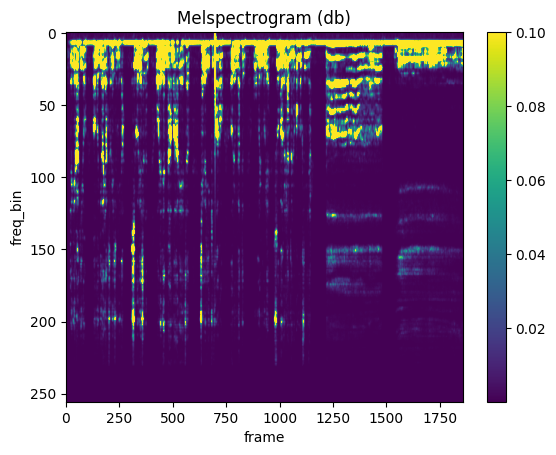

(256, 1857)


=========== train_data_spectrogram_example ===========


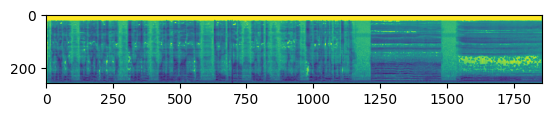



=========== train_data_metadata.json_example ===========
"wav_code", "source_type" --> are not unnecessary
{
	"wav_code": 1521,
	"source_type": "B",
	"diagnosis": "Paralysis",
	"age": 77.4,
	"sex": "M"
}


=========== train_data_anno.json_example ===========
"startFrame", "endFrame" --> x-coordinate value for column of csv or image
{
	"data_idx": "55097557",
	"source_data": "1521_annot.wav",
	"value": [
		{
			"timestamp": 1630315815498,
			"token_no": "1",
			"token_skip": "skip",
			"token_pronounce": "skip",
			"startFrame": 6,
			"endFrame": 16
		},
		{
			"timestamp": 1630315845394,
			"token_no": "2",
			"token_skip": "normal",
			"token_pronounce": "abnormal",
			"startFrame": 19,
			"endFrame": 46
		},
		{
			"timestamp": 1630315870669,
			"token_no": "3",
			"token_skip": "normal",
			"token_pronounce": "normal",
			"startFrame": 45,
			"endFrame": 98
		},
		{
			"timestamp": 1630315884265,
			"token_no": "4",
			"token_skip": "normal",
			"token_pronounce": "normal",
			"st

In [143]:
# This block is for checking the structure of the given dataset

def plot_Melspectrogram(data, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
  fig, axs = plt.subplots(1, 1)
  axs.set_title('Melspectrogram (db)')
  axs.set_ylabel(ylabel)
  axs.set_xlabel('frame')
  im = axs.imshow(data, cmap='viridis', interpolation= 'gaussian', aspect=aspect, vmin=1e-4, vmax=1e-1)
  # im = axs.imshow(data, cmap='viridis', interpolation= 'gaussian', aspect=aspect, vmin=1e-25, vmax=1e-2)
  # cmap='viridis', 'viridis_r', 'inferno', 'inferno_r', 'plasma', plt.cm.Blues, plt.cm.Blues_r, 'BrBG', 'BrBG_r'
  if xmax:
    axs.set_xlim((0, xmax))
  fig.colorbar(im, ax=axs)
  plt.show()
    
    
# ■■■■■ Loading and Checking the [number] of dataset for training 
train_idx = []
for filename in os.listdir("/mnt/dataset/source/"): 
    if filename.startswith("data"):
        #print('=========== file name cut ===========')
        #print(filename[4:-8])
        train_idx.append(filename[4:-8])
train_idx_arr_all = np.asarray(train_idx)
train_idx = pd.DataFrame(train_idx_arr_all, columns = ['num'])
#print(train_idx)
print('\n\n=========== train_data_num(Used) ===========')
print(train_idx.head())
print(train_idx.shape)


# ■■■■■ Loading and Checking the [ID] of dataset for training 
print('\n\n=========== train_data_ID (Used) ===========')

train_id_all= []
for idx in train_idx_arr_all:
    with open('/mnt/dataset/metadata/data' +  str(idx)  +'_metadata.json', 'r') as f:
        #print(idx)
        train_meta_json = json.load(f)
        train_id = train_meta_json['diagnosis']       # Train id data

        if train_id == 'Normal':
            train_id = 0
        if train_id == 'Cancer':
            train_id = 1
        if train_id == 'Cyst_and_Polyp':
            train_id = 2
        if train_id == 'Nodules':
            train_id = 3
        if train_id == 'Functional_dysphonia':
            train_id = 4
        if train_id == 'Paralysis':
            train_id = 5 
        train_id_all = np.append(train_id_all, train_id)
train_id_all = np.asarray(train_id_all)
print(train_id_all)

# ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
# ■■■■■ Concatenating and Checking the [Num - ID] of dataset for training ■■■■■
# ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

print('\n\n=========== train_data_ [Num-ID] (Used) ===========')
train_idx_arr_all = np.asarray(train_idx_arr_all)
train_id_all = np.asarray(train_id_all)


train_num_id_all = np.vstack((train_idx_arr_all, train_id_all))
train_num_id_all = train_num_id_all.transpose()
train_num_id_all = train_num_id_all.astype(np.float32)
train_num_id_all = train_num_id_all.astype(np.int32)
train_num_id_all = np.asarray(train_num_id_all)
train_num_id_all = pd.DataFrame(train_num_id_all, columns = ['num', 'id'])

allData_part = []
for id_idx in range(0, 6) :
    allData_part.append(train_num_id_all[train_num_id_all['id'] == id_idx].sample(n=200, replace = True))
train_idx_class_bal = pd.concat(allData_part, axis=0, ignore_index=False)
train_idx_class_bal = pd.DataFrame(train_idx_class_bal, columns = ['num', 'id'])
train_idx_class_bal = train_idx_class_bal.reset_index(drop = True, inplace=False)
print(train_idx_class_bal)  
print(train_idx_class_bal.shape)


# ■■■■■ Loading and Checking the [number] of dataset for training (Not Used)
train_data_num = pd.read_csv('/mnt/dataset/answer_format.csv')
train_data_num = train_data_num.values[:, :].astype('int32')
train_data_num = pd.DataFrame(train_data_num, columns = ['num', 'dummy'])
train_data_num = train_data_num.loc[:, ['num']]

print('\n\n=========== train_data_num(Not used) ===========')
print(train_data_num.head())
print(train_data_num.shape)
# ■■■■■ Loading and Checking the [csv] of dataset for training 
train_data_mel_example = pd.read_csv('/mnt/dataset/source/data892_mel.csv')
train_data_mel_example = train_data_mel_example.values[:,1:]
print('\n\n=========== train_data_Mel ===========')
print(train_data_mel_example.shape)
print(train_data_mel_example)
print(max(map(max, train_data_mel_example)))
print(min(map(min, train_data_mel_example)))
plot_Melspectrogram(train_data_mel_example, title=None, ylabel='freq_bin', aspect='auto', xmax=None)


# ■■■■■ Loading and Checking the [images] of dataset for training 
train_data_mel_example =cv2.imread('/mnt/dataset/images/data892.png', cv2.IMREAD_UNCHANGED)
print(train_data_mel_example.shape)
print('\n\n=========== train_data_spectrogram_example ===========')
plt.imshow(train_data_mel_example)
plt.show()

# ■■■■■ Loading and Checking the [metadata.json] of dataset for training 
# ■ Sample
with open('/mnt/dataset/metadata/data892_metadata.json', 'r') as f:
    train_data_meta_json_example = json.load(f)
print('\n\n=========== train_data_metadata.json_example ===========')
print('"wav_code", "source_type" --> are not unnecessary')
print(json.dumps(train_data_meta_json_example, indent="\t") )

# ■ All
path_to_meta_json = '/mnt/dataset/metadata/'
meta_json_files = [pos_json for pos_json in os.listdir(path_to_meta_json) if pos_json.endswith('.json')]
# print(meta_json_files)


# ■■■■■ Loading and Checking the [annotation.json] of dataset for training 
# ■ Sample
with open('/mnt/dataset/annotation/data892_annotation.json', 'r') as f:
    train_data_anno_json_example = json.load(f)
print('\n\n=========== train_data_anno.json_example ===========')
print('"startFrame", "endFrame" --> x-coordinate value for column of csv or image')
print(json.dumps(train_data_anno_json_example, indent="\t") )

# ■ All
path_to_anno_json = '/mnt/dataset/annotation/'
anno_json_files = [pos_json for pos_json in os.listdir(path_to_anno_json) if pos_json.endswith('.json')]
# print(anno_json_files)


In [144]:
batchsize = 8
mel_time_size = 2048
mel_freq_size = 256

train_data_path = '/mnt/dataset'

class train_SoundData(Dataset):
    def __init__(self, df, data_path, transforms=None):
        self.df = df
        self.data_path = str(data_path)
        self.transforms = transforms

    # ----------------------------
    # Number of items in dataset
    # ----------------------------
    def __len__(self):
        return len(self.df)

    # ----------------------------
    # Get i'th item in dataset
    # ----------------------------
    def __getitem__(self, idx):
        train_mel_path = self.data_path + '/source/data' + str(self.df.loc[idx, 'num']).zfill(3) + '_mel.csv'
        #print(idx)
        train_mel = pd.read_csv(train_mel_path)
        train_mel = train_mel.values[:,:] 
        
        if self.transforms is not None:
            augmented = self.transforms(image=train_mel)
            train_mel = augmented['image']   
            train_mel = train_mel.astype(np.float32)  # Train melspectrogram data
            
        with open(self.data_path +'/metadata/data' +  str(self.df.loc[idx, 'num']).zfill(3)  +'_metadata.json', 'r') as f:
            train_meta_json = json.load(f)
        train_id = train_meta_json['diagnosis']       # Train id data
       
        if train_id=='Normal':
            train_id=0
        if train_id=='Cancer':
            train_id=1
        if train_id=='Cyst_and_Polyp':
            train_id=2
        if train_id=='Nodules':
            train_id=3
        if train_id=='Functional_dysphonia':
            train_id=4
        if train_id=='Paralysis':
            train_id=5 
        train_id = np.asarray(train_id)
                
        
        #  Normal (정상) 0 / Cancer (후두암) 1/ Cyst_and_Polyp (물혹/폴립) 2/ Nodules (성대결절)  3
        #  Functional_dysphonia (기능성 음성질환) 4/ Paralysis (성대 마비) 5
        
        
        return train_mel, train_id


resize_transforms = albu.Compose([albu.Resize(mel_time_size, mel_freq_size, always_apply=True), ])

train_data       = train_SoundData(train_idx_class_bal, train_data_path, resize_transforms)  # train_idx  : not balanced
train_dataset    = torch.utils.data.DataLoader(train_data, batch_size=batchsize, shuffle=True)

def trash_check():
    trash_check= 0
    for batch_idx_trash, (mels_trash, targets_trash) in enumerate(train_dataset):
        trash_check+= 1
        if trash_check ==1 :
            print('\n\n=========== trash_check',trash_check, '===========') 
            print(mels_trash)
            print(targets_trash)
        else:
            break;
trash_check()



=========== trash_check 1 ===========
tensor([[[1.0382e-01, 1.8285e-01, 4.0974e-02,  ..., 8.6972e-02,
          1.1883e-01, 9.8525e-02],
         [1.0382e-01, 1.8285e-01, 4.0974e-02,  ..., 8.6972e-02,
          1.1883e-01, 9.8525e-02],
         [1.0382e-01, 1.8285e-01, 4.0974e-02,  ..., 8.6972e-02,
          1.1883e-01, 9.8525e-02],
         ...,
         [1.1406e-07, 4.6150e-14, 7.1112e-14,  ..., 1.1504e-16,
          1.4363e-16, 1.8701e-16],
         [1.1406e-07, 4.6150e-14, 7.1112e-14,  ..., 1.1504e-16,
          1.4363e-16, 1.8701e-16],
         [1.1406e-07, 4.6150e-14, 7.1112e-14,  ..., 1.1504e-16,
          1.4363e-16, 1.8701e-16]],

        [[4.6711e-03, 4.3165e-03, 9.5259e-03,  ..., 1.4758e-03,
          3.9232e-03, 7.4740e-03],
         [4.6711e-03, 4.3165e-03, 9.5259e-03,  ..., 1.4758e-03,
          3.9232e-03, 7.4740e-03],
         [4.6711e-03, 4.3165e-03, 9.5259e-03,  ..., 1.4758e-03,
          3.9232e-03, 7.4740e-03],
         ...,
         [8.0510e-18, 5.3196e-18, 6.547

In [215]:
def conv_1(in_dim,out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim,1,1),
        nn.ReLU(),
    )
    return model

def conv_1_3(in_dim,mid_dim,out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim,mid_dim,1,1),
        nn.ReLU(),
        nn.Conv2d(mid_dim,out_dim,3,1,1),
        nn.ReLU()
    )
    return model
    
def conv_1_5(in_dim,mid_dim,out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim,mid_dim,1,1),
        nn.ReLU(),
        nn.Conv2d(mid_dim,out_dim,5,1,2),
        nn.ReLU()
    )
    return model
    

def max_3_1(in_dim,out_dim):
    model = nn.Sequential(
        nn.MaxPool2d(3,1,1),
        nn.Conv2d(in_dim,out_dim,1,1),
        nn.ReLU(),
    )
    return model

class inception_module(nn.Module):
    def __init__(self,in_dim,out_dim_1,mid_dim_3,out_dim_3,mid_dim_5,out_dim_5,pool):
        super(inception_module,self).__init__()
        self.conv_1 = conv_1(in_dim,out_dim_1)
        self.conv_1_3 = conv_1_3(in_dim,mid_dim_3,out_dim_3)
        self.conv_1_5 = conv_1_5(in_dim,mid_dim_5,out_dim_5)
        self.max_3_1 = max_3_1(in_dim,pool)

    def forward(self,x):
        out_1 = self.conv_1(x)
        out_2 = self.conv_1_3(x)
        out_3 = self.conv_1_5(x)
        out_4 = self.max_3_1(x)
        output = torch.cat([out_1,out_2,out_3,out_4],1)
        return output
    
# ----------------------------
# Melspectro Classifier Model
# ----------------------------
class Melspectro_classifier(nn.Module):
    # ----------------------------
    # Build the model architecture
    # ----------------------------
    def __init__(self):
        super().__init__()
        
#         self.layer_1 = nn.Sequential(
#             nn.Conv2d(1,16,7,2,3),
#             #nn.MaxPool2d(3,2,1),
#             nn.Conv2d(16,16*3,3,1,1),
#             #nn.MaxPool2d(3,2,1),
#         )
#         self.layer_2 = nn.Sequential(
#             inception_module(16*3,64,96,128,16,32,32),
#             inception_module(256,128,128,192,32,96,64),
#             nn.MaxPool2d(3,2,1),
#         )
#         self.layer_3 = nn.Sequential(
#             inception_module(480,192,96,208,16,48,64),
#             inception_module(512,160,112,224,24,64,64),
#             inception_module(512,128,128,256,24,64,64),
#             inception_module(512,112,144,288,32,64,64),
#             inception_module(528,256,160,320,32,128,128),
#             nn.MaxPool2d(3,2,1),
#         )
#         self.layer_4 = nn.Sequential(
#             inception_module(832,256,160,320,32,128,128),
#             inception_module(832,384,192,384,48,128,128), 
#             nn.AvgPool2d(16,1),
#         )
#         self.layer_5 = nn.Dropout2d(0.4)
#         self.fc_layer1 = nn.Linear(1024*8,1024*4)
#         self.fc_layer2 = nn.Linear(1024*4,1024)
#         self.fc_layer3 = nn.Linear(1024,6)
#         self.print_shape = True

        self.layer_1 = nn.Sequential(
            nn.Conv2d(1,3,7,2,3),
            nn.MaxPool2d(3,2,1),
            nn.Conv2d(3,6,3,1,1),
            nn.MaxPool2d(3,2,1),
            nn.AvgPool2d(32,32),
        )
        self.layer_2 = nn.Sequential(
            inception_module(6,16,24,32,4,8,8),
            inception_module(64,8,8,12,2,6,4),
            nn.MaxPool2d(3,2,1),
        )
        self.layer_3 = nn.Sequential(
            inception_module(30,16,24,32,4,8,8),
            inception_module(64,8,8,12,2,6,4),
            nn.MaxPool2d(3,2,1),
            nn.AvgPool2d(8,57),
            

        )

        self.layer_5 = nn.Dropout2d(0.3)
        self.fc_layer1 = nn.Linear(30,16)
        self.fc_layer3 = nn.Linear(48,6)
        self.ReLU = nn.ReLU()
        self.print_shape = True

    # ----------------------------
    # Forward pass computations
    # ----------------------------
    def forward(self, x):
        # Run the convolutional blocks
        if self.print_shape: print('input----',x.shape)
        out = self.layer_1(x)
        if self.print_shape: print('layer 1----', out.shape)
#         out = self.layer_2(out)
#         if self.print_shape: print('layer 2----',out.shape)
#         out = self.layer_3(out)
#         if self.print_shape: print('layer 3----',out.shape)
        out = self.layer_5(out)
        if self.print_shape: print('layer 5----',out.shape)
        out = out.view(out.size(0),-1)
        if self.print_shape: print('layer before FC----',out.shape)
#         out = self.fc_layer1(out)
#         out = self.ReLU(out)
#         if self.print_shape: print('layer FC1----',out.shape)
        out = self.fc_layer3(out)
        if self.print_shape: print('layer FC3----',out.shape); self.print_shape = False

        return out
    
Mel_classifier = Melspectro_classifier()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device =  "cpu"
#Mel_classifier = Mel_classifier.to(device)

# summary(Mel_classifier, input_size=(1,256,2048), batch_size=8)

# Check that it is on Cuda
print('\n\n=========== Where the model is located ===========')
next(Mel_classifier.parameters()).device





=========== Where the model is located ===========


device(type='cpu')

In [216]:
for i in Mel_classifier.named_children():
    print(i)

('layer_1', Sequential(
  (0): Conv2d(1, 3, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (2): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): AvgPool2d(kernel_size=32, stride=32, padding=0)
))
('layer_2', Sequential(
  (0): inception_module(
    (conv_1): Sequential(
      (0): Conv2d(6, 16, kernel_size=(1, 1), stride=(1, 1))
      (1): ReLU()
    )
    (conv_1_3): Sequential(
      (0): Conv2d(6, 24, kernel_size=(1, 1), stride=(1, 1))
      (1): ReLU()
      (2): Conv2d(24, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
    )
    (conv_1_5): Sequential(
      (0): Conv2d(6, 4, kernel_size=(1, 1), stride=(1, 1))
      (1): ReLU()
      (2): Conv2d(4, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (3): ReLU()
    )
    (max_3_1): Sequential(
      (0): MaxP

In [217]:
num_epochs = 30
train_loss_values = np.zeros([num_epochs])

# ----------------------------
# Saver
# ----------------------------
def save_checkpoint(state, is_best, filename='Mel_classifier_incept1.pt'):
    torch.save(state, filename)
    if is_best:
        shutil.copyfile(filename, 'model_best_incept1.pt')

        
# ----------------------------
# Training 
# ----------------------------
def training(model, train_dataset, num_epochs):
    # Loss Function, Optimizer and Scheduler
    model.train()
    best_acc1 = 0

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                                  lr_lambda=lambda epoch: 0.96 ** epoch)
#     optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#     from torch.optim.lr_scheduler import StepLR
#     scheduler = StepLR(optimizer, step_size=3, gamma=0.1)

    
    
    # Repeat for each epoch
    for epoch in range(num_epochs):
        print('\n=========== Epoch',epoch,  '===========')
        running_loss = 0.0
        correct_prediction = 0
        total_prediction = 0
        train_loss_tot = 0
        
        
        # Repeat for each batch in the training set
        for i, data in enumerate(train_dataset):
            # Get the mels features and target labels, and put them on the GPU
            #print( data[0])
            #print( data[1])
            mels, labels = data[0].to(device), data[1].to(device)
            
            #■
            mels = torch.unsqueeze(mels, 1)
            
            # Normalize the mels
            mels_m, mels_s = mels.mean(), mels.std()
            mels = (mels - mels_m) / mels_s
            
            # Zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(mels)
            loss = criterion(outputs, labels)
            train_loss_tot += loss
            loss.backward()
            optimizer.step()
            scheduler.step()

            # Keep stats for Loss and Accuracy
            running_loss += loss.item()

            # Get the predicted class with the highest score
            _, prediction = torch.max(outputs, 1)
  
            # Count of predictions that matched the target label
            correct_prediction += (prediction == labels).sum().item()
            total_prediction += prediction.shape[0]
            acc = correct_prediction / total_prediction
        
        train_loss_tot /= len(mels)
        train_loss_values[epoch] = train_loss_tot
        print('train_loss_values[epoch] | ',train_loss_values[epoch])
    save_checkpoint(Mel_classifier , 1)
    print('Finished Training')


print('\n\n=====================================================')
print('================= Starting Training =================')
print('=====================================================\n')
# (n_samples, channels, height, width)
training(Mel_classifier, train_dataset, num_epochs)



================= Starting Training =================


=========== Epoch 0 ===========
input---- torch.Size([8, 1, 2048, 256])
layer 1---- torch.Size([8, 6, 8, 1])
layer 5---- torch.Size([8, 6, 8, 1])
layer before FC---- torch.Size([8, 48])
layer FC3---- torch.Size([8, 6])
train_loss_values[epoch] |  33.74510192871094

=========== Epoch 1 ===========
train_loss_values[epoch] |  33.709716796875

=========== Epoch 2 ===========
train_loss_values[epoch] |  33.71194839477539

=========== Epoch 3 ===========
train_loss_values[epoch] |  33.754119873046875

=========== Epoch 4 ===========
train_loss_values[epoch] |  33.69668960571289

=========== Epoch 5 ===========
train_loss_values[epoch] |  33.66448974609375

=========== Epoch 6 ===========
train_loss_values[epoch] |  33.674705505371094

=========== Epoch 7 ===========
train_loss_values[epoch] |  33.67226791381836

=========== Epoch 8 ===========


KeyboardInterrupt: 

In [ ]:
x_len = np.arange(len(train_loss_values))
plt.plot( x_len ,train_loss_values, marker = '.',label="Train loss")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

[tensor([[[1.8948e-02, 2.6214e-03, 4.3347e-03,  ..., 1.7364e-02,
          2.2162e-02, 4.8455e-03],
         [1.8948e-02, 2.6214e-03, 4.3347e-03,  ..., 1.7364e-02,
          2.2162e-02, 4.8455e-03],
         [1.8948e-02, 2.6214e-03, 4.3347e-03,  ..., 1.7364e-02,
          2.2162e-02, 4.8455e-03],
         ...,
         [5.3098e-17, 6.2865e-17, 4.7510e-17,  ..., 2.7629e-15,
          2.9124e-15, 4.6882e-15],
         [5.3098e-17, 6.2865e-17, 4.7510e-17,  ..., 2.7629e-15,
          2.9124e-15, 4.6882e-15],
         [5.3098e-17, 6.2865e-17, 4.7510e-17,  ..., 2.7629e-15,
          2.9124e-15, 4.6882e-15]],

        [[1.1584e-01, 1.3630e-01, 6.3582e-02,  ..., 1.5845e-01,
          1.0291e-01, 6.8404e-02],
         [1.1584e-01, 1.3630e-01, 6.3582e-02,  ..., 1.5845e-01,
          1.0291e-01, 6.8404e-02],
         [1.1584e-01, 1.3630e-01, 6.3582e-02,  ..., 1.5845e-01,
          1.0291e-01, 6.8404e-02],
         ...,
         [4.9241e-17, 2.8677e-17, 3.5363e-17,  ..., 4.1920e-15,
          8.18

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.041667  1.000000  0.080000         1
           1   0.000000  0.000000  0.000000         4
           2   0.000000  0.000000  0.000000         4
           3   0.000000  0.000000  0.000000         4
           4   0.000000  0.000000  0.000000         6
           5   0.000000  0.000000  0.000000         5

    accuracy                       0.041667        24
   macro avg   0.006944  0.166667  0.013333        24
weighted avg   0.001736  0.041667  0.003333        24



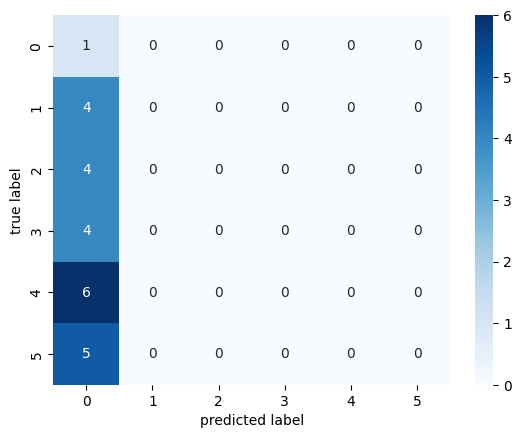

[tensor([[[3.7409e-01, 2.5534e-01, 1.6622e-01,  ..., 3.8851e-01,
          6.3550e-02, 2.0472e-01],
         [3.7409e-01, 2.5534e-01, 1.6622e-01,  ..., 3.8851e-01,
          6.3550e-02, 2.0472e-01],
         [3.7409e-01, 2.5534e-01, 1.6622e-01,  ..., 3.8851e-01,
          6.3550e-02, 2.0472e-01],
         ...,
         [9.1346e-09, 2.6117e-16, 3.5556e-14,  ..., 1.9608e-16,
          1.1000e-16, 1.0546e-16],
         [9.1346e-09, 2.6117e-16, 3.5556e-14,  ..., 1.9608e-16,
          1.1000e-16, 1.0546e-16],
         [9.1346e-09, 2.6117e-16, 3.5556e-14,  ..., 1.9608e-16,
          1.1000e-16, 1.0546e-16]],

        [[1.9188e-02, 3.8690e-02, 4.4252e-02,  ..., 3.8867e-02,
          1.2492e-02, 7.7162e-02],
         [1.9188e-02, 3.8690e-02, 4.4252e-02,  ..., 3.8867e-02,
          1.2492e-02, 7.7162e-02],
         [1.9188e-02, 3.8690e-02, 4.4252e-02,  ..., 3.8867e-02,
          1.2492e-02, 7.7162e-02],
         ...,
         [1.3654e-16, 1.7141e-17, 2.0949e-17,  ..., 6.9698e-14,
          6.53

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.250000  1.000000  0.400000         6
           1   0.000000  0.000000  0.000000         4
           2   0.000000  0.000000  0.000000         1
           3   0.000000  0.000000  0.000000         7
           4   0.000000  0.000000  0.000000         3
           5   0.000000  0.000000  0.000000         3

    accuracy                       0.250000        24
   macro avg   0.041667  0.166667  0.066667        24
weighted avg   0.062500  0.250000  0.100000        24



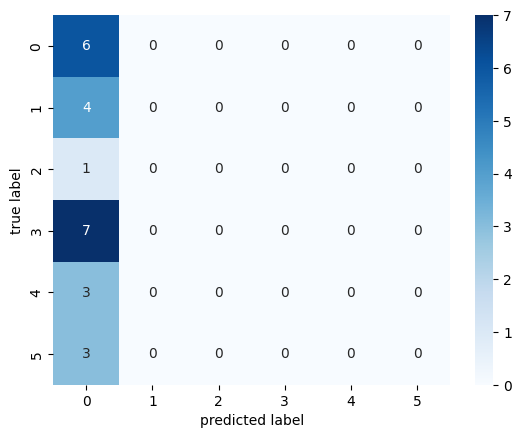

[tensor([[[1.9883e-02, 1.4214e-03, 2.8168e-04,  ..., 2.8656e-04,
          2.3388e-04, 1.5293e-02],
         [1.9883e-02, 1.4214e-03, 2.8168e-04,  ..., 2.8656e-04,
          2.3388e-04, 1.5293e-02],
         [1.9883e-02, 1.4214e-03, 2.8168e-04,  ..., 2.8656e-04,
          2.3388e-04, 1.5293e-02],
         ...,
         [1.5719e-17, 1.3223e-15, 1.0414e-14,  ..., 1.4650e-15,
          2.2961e-15, 2.4111e-16],
         [1.5719e-17, 1.3223e-15, 1.0414e-14,  ..., 1.4650e-15,
          2.2961e-15, 2.4111e-16],
         [1.5719e-17, 1.3223e-15, 1.0414e-14,  ..., 1.4650e-15,
          2.2961e-15, 2.4111e-16]],

        [[3.1198e-02, 1.1881e-02, 1.1860e-01,  ..., 4.7466e-01,
          8.5903e-02, 6.7287e-02],
         [3.1198e-02, 1.1881e-02, 1.1860e-01,  ..., 4.7466e-01,
          8.5903e-02, 6.7287e-02],
         [3.1198e-02, 1.1881e-02, 1.1860e-01,  ..., 4.7466e-01,
          8.5903e-02, 6.7287e-02],
         ...,
         [2.1212e-09, 1.2962e-17, 2.2106e-17,  ..., 5.9292e-16,
          3.15

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.208333  1.000000  0.344828         5
           1   0.000000  0.000000  0.000000         5
           2   0.000000  0.000000  0.000000         1
           3   0.000000  0.000000  0.000000         3
           4   0.000000  0.000000  0.000000         2
           5   0.000000  0.000000  0.000000         8

    accuracy                       0.208333        24
   macro avg   0.034722  0.166667  0.057471        24
weighted avg   0.043403  0.208333  0.071839        24



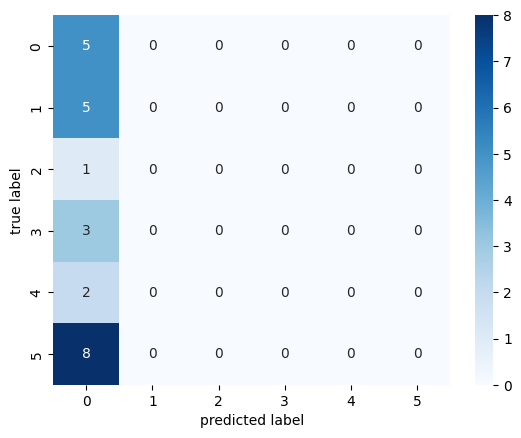

[tensor([[[4.3712e-02, 4.9695e-03, 3.4633e-03,  ..., 9.8897e-03,
          4.2538e-03, 7.9489e-03],
         [4.3712e-02, 4.9695e-03, 3.4633e-03,  ..., 9.8897e-03,
          4.2538e-03, 7.9489e-03],
         [4.3712e-02, 4.9695e-03, 3.4633e-03,  ..., 9.8897e-03,
          4.2538e-03, 7.9489e-03],
         ...,
         [2.0922e-17, 2.2057e-18, 9.9384e-18,  ..., 4.9711e-15,
          4.8838e-15, 2.6330e-15],
         [2.0922e-17, 2.2057e-18, 9.9384e-18,  ..., 4.9711e-15,
          4.8838e-15, 2.6330e-15],
         [2.0922e-17, 2.2057e-18, 9.9384e-18,  ..., 4.9711e-15,
          4.8838e-15, 2.6330e-15]],

        [[8.9961e-03, 6.2205e-04, 5.6445e-05,  ..., 1.8122e-04,
          1.0366e-03, 2.7913e-03],
         [8.9961e-03, 6.2205e-04, 5.6445e-05,  ..., 1.8122e-04,
          1.0366e-03, 2.7913e-03],
         [8.9961e-03, 6.2205e-04, 5.6445e-05,  ..., 1.8122e-04,
          1.0366e-03, 2.7913e-03],
         ...,
         [4.7623e-18, 3.5484e-18, 1.1330e-18,  ..., 4.9960e-15,
          8.07

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.208333  1.000000  0.344828         5
           1   0.000000  0.000000  0.000000         3
           2   0.000000  0.000000  0.000000         3
           3   0.000000  0.000000  0.000000         2
           4   0.000000  0.000000  0.000000         5
           5   0.000000  0.000000  0.000000         6

    accuracy                       0.208333        24
   macro avg   0.034722  0.166667  0.057471        24
weighted avg   0.043403  0.208333  0.071839        24



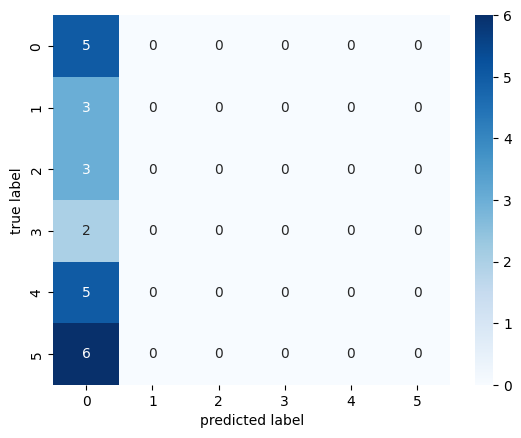

[tensor([[[2.6832e-03, 6.1943e-03, 3.1799e-03,  ..., 1.0548e-01,
          6.9245e-02, 1.0452e-01],
         [2.6832e-03, 6.1943e-03, 3.1799e-03,  ..., 1.0548e-01,
          6.9245e-02, 1.0452e-01],
         [2.6832e-03, 6.1943e-03, 3.1799e-03,  ..., 1.0548e-01,
          6.9245e-02, 1.0452e-01],
         ...,
         [2.7350e-09, 7.7380e-17, 3.3691e-16,  ..., 6.2376e-17,
          1.0070e-16, 6.6580e-16],
         [2.7350e-09, 7.7380e-17, 3.3691e-16,  ..., 6.2376e-17,
          1.0070e-16, 6.6580e-16],
         [2.7350e-09, 7.7380e-17, 3.3691e-16,  ..., 6.2376e-17,
          1.0070e-16, 6.6580e-16]],

        [[1.0259e-03, 7.7915e-03, 4.0228e-03,  ..., 1.8117e-02,
          2.7874e-03, 6.0901e-03],
         [1.0259e-03, 7.7915e-03, 4.0228e-03,  ..., 1.8117e-02,
          2.7874e-03, 6.0901e-03],
         [1.0259e-03, 7.7915e-03, 4.0228e-03,  ..., 1.8117e-02,
          2.7874e-03, 6.0901e-03],
         ...,
         [2.4243e-09, 3.9219e-18, 3.2986e-17,  ..., 5.9974e-17,
          1.79

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.125000  1.000000  0.222222         3
           1   0.000000  0.000000  0.000000         6
           2   0.000000  0.000000  0.000000         2
           3   0.000000  0.000000  0.000000         4
           4   0.000000  0.000000  0.000000         4
           5   0.000000  0.000000  0.000000         5

    accuracy                       0.125000        24
   macro avg   0.020833  0.166667  0.037037        24
weighted avg   0.015625  0.125000  0.027778        24



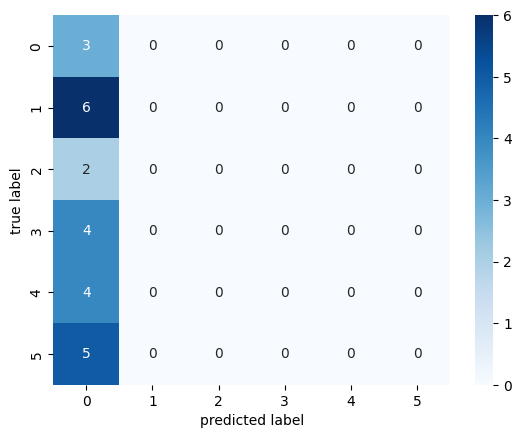

[tensor([[[1.3594e-02, 3.3103e-02, 1.2603e-02,  ..., 7.6107e-03,
          8.6767e-04, 1.3571e-02],
         [1.3594e-02, 3.3103e-02, 1.2603e-02,  ..., 7.6107e-03,
          8.6767e-04, 1.3571e-02],
         [1.3594e-02, 3.3103e-02, 1.2603e-02,  ..., 7.6107e-03,
          8.6767e-04, 1.3571e-02],
         ...,
         [9.1090e-14, 3.6734e-14, 1.5943e-14,  ..., 5.1858e-17,
          1.3253e-17, 2.9368e-17],
         [9.1090e-14, 3.6734e-14, 1.5943e-14,  ..., 5.1858e-17,
          1.3253e-17, 2.9368e-17],
         [9.1090e-14, 3.6734e-14, 1.5943e-14,  ..., 5.1858e-17,
          1.3253e-17, 2.9368e-17]],

        [[4.8061e-01, 5.5436e-01, 7.2350e-01,  ..., 8.8693e-01,
          6.6025e-02, 2.0594e-01],
         [4.8061e-01, 5.5436e-01, 7.2350e-01,  ..., 8.8693e-01,
          6.6025e-02, 2.0594e-01],
         [4.8061e-01, 5.5436e-01, 7.2350e-01,  ..., 8.8693e-01,
          6.6025e-02, 2.0594e-01],
         ...,
         [3.6542e-08, 1.5783e-16, 4.0514e-16,  ..., 2.4471e-16,
          2.49

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.208333  1.000000  0.344828         5
           1   0.000000  0.000000  0.000000         4
           2   0.000000  0.000000  0.000000         6
           3   0.000000  0.000000  0.000000         1
           4   0.000000  0.000000  0.000000         6
           5   0.000000  0.000000  0.000000         2

    accuracy                       0.208333        24
   macro avg   0.034722  0.166667  0.057471        24
weighted avg   0.043403  0.208333  0.071839        24



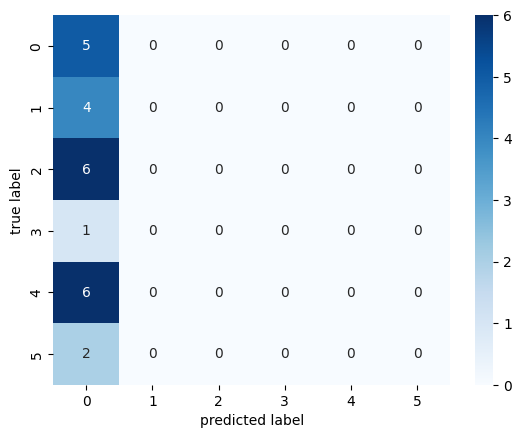

[tensor([[[5.7554e-02, 9.3032e-03, 1.2463e-02,  ..., 1.4136e-03,
          5.4730e-03, 4.2253e-03],
         [5.7554e-02, 9.3032e-03, 1.2463e-02,  ..., 1.4136e-03,
          5.4730e-03, 4.2253e-03],
         [5.7554e-02, 9.3032e-03, 1.2463e-02,  ..., 1.4136e-03,
          5.4730e-03, 4.2253e-03],
         ...,
         [9.8290e-18, 8.5782e-18, 9.5170e-18,  ..., 1.3305e-15,
          9.4784e-16, 6.3286e-17],
         [9.8290e-18, 8.5782e-18, 9.5170e-18,  ..., 1.3305e-15,
          9.4784e-16, 6.3286e-17],
         [9.8290e-18, 8.5782e-18, 9.5170e-18,  ..., 1.3305e-15,
          9.4784e-16, 6.3286e-17]],

        [[4.2786e-02, 4.8044e-04, 2.1738e-03,  ..., 3.9442e-04,
          1.1642e-03, 3.0322e-03],
         [4.2786e-02, 4.8044e-04, 2.1738e-03,  ..., 3.9442e-04,
          1.1642e-03, 3.0322e-03],
         [4.2786e-02, 4.8044e-04, 2.1738e-03,  ..., 3.9442e-04,
          1.1642e-03, 3.0322e-03],
         ...,
         [1.2244e-16, 1.3469e-17, 1.8976e-17,  ..., 1.1820e-14,
          1.75

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.375000  1.000000  0.545455         9
           1   0.000000  0.000000  0.000000         3
           2   0.000000  0.000000  0.000000         3
           3   0.000000  0.000000  0.000000         1
           4   0.000000  0.000000  0.000000         5
           5   0.000000  0.000000  0.000000         3

    accuracy                       0.375000        24
   macro avg   0.062500  0.166667  0.090909        24
weighted avg   0.140625  0.375000  0.204545        24



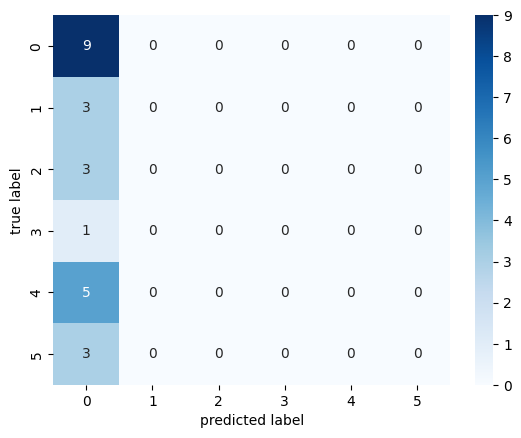

[tensor([[[6.4269e-02, 5.0878e-02, 1.3896e-01,  ..., 1.8893e-02,
          1.5657e-02, 1.0581e-01],
         [6.4269e-02, 5.0878e-02, 1.3896e-01,  ..., 1.8893e-02,
          1.5657e-02, 1.0581e-01],
         [6.4269e-02, 5.0878e-02, 1.3896e-01,  ..., 1.8893e-02,
          1.5657e-02, 1.0581e-01],
         ...,
         [8.0769e-09, 7.8463e-17, 4.7535e-17,  ..., 1.6420e-14,
          2.2872e-14, 4.0814e-07],
         [8.0769e-09, 7.8463e-17, 4.7535e-17,  ..., 1.6420e-14,
          2.2872e-14, 4.0814e-07],
         [8.0769e-09, 7.8463e-17, 4.7535e-17,  ..., 1.6420e-14,
          2.2872e-14, 4.0814e-07]],

        [[2.5505e+02, 4.0411e+01, 8.7134e-01,  ..., 1.8264e-03,
          1.0318e-02, 3.4481e-03],
         [2.5505e+02, 4.0411e+01, 8.7134e-01,  ..., 1.8264e-03,
          1.0318e-02, 3.4481e-03],
         [2.5505e+02, 4.0411e+01, 8.7134e-01,  ..., 1.8264e-03,
          1.0318e-02, 3.4481e-03],
         ...,
         [9.7147e-14, 2.1879e-14, 4.0262e-14,  ..., 1.2406e-14,
          2.17

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.125000  1.000000  0.222222         3
           1   0.000000  0.000000  0.000000         4
           2   0.000000  0.000000  0.000000         7
           3   0.000000  0.000000  0.000000         5
           4   0.000000  0.000000  0.000000         2
           5   0.000000  0.000000  0.000000         3

    accuracy                       0.125000        24
   macro avg   0.020833  0.166667  0.037037        24
weighted avg   0.015625  0.125000  0.027778        24



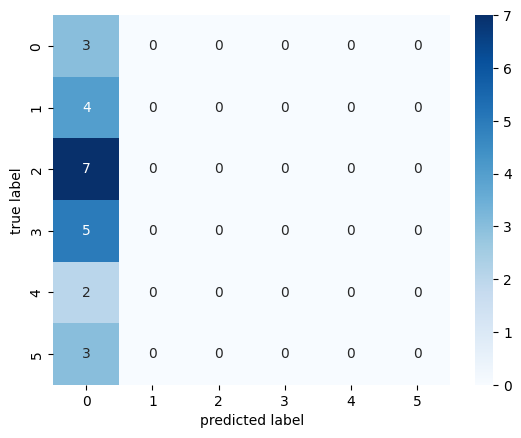

[tensor([[[3.5814e-06, 9.7270e-05, 1.9376e-04,  ..., 1.8379e-05,
          7.1008e-06, 6.4835e-06],
         [3.5814e-06, 9.7270e-05, 1.9376e-04,  ..., 1.8379e-05,
          7.1008e-06, 6.4835e-06],
         [3.5814e-06, 9.7270e-05, 1.9376e-04,  ..., 1.8379e-05,
          7.1008e-06, 6.4835e-06],
         ...,
         [1.4520e-09, 4.2469e-18, 1.4900e-15,  ..., 2.2006e-16,
          7.7025e-17, 7.8500e-12],
         [1.4520e-09, 4.2469e-18, 1.4900e-15,  ..., 2.2006e-16,
          7.7025e-17, 7.8500e-12],
         [1.4520e-09, 4.2469e-18, 1.4900e-15,  ..., 2.2006e-16,
          7.7025e-17, 7.8500e-12]],

        [[2.3206e-02, 6.8051e-02, 3.1524e-02,  ..., 2.4483e-02,
          3.7546e-03, 7.0147e-03],
         [2.3206e-02, 6.8051e-02, 3.1524e-02,  ..., 2.4483e-02,
          3.7546e-03, 7.0147e-03],
         [2.3206e-02, 6.8051e-02, 3.1524e-02,  ..., 2.4483e-02,
          3.7546e-03, 7.0147e-03],
         ...,
         [2.4534e-17, 3.7707e-17, 2.9940e-17,  ..., 3.5667e-15,
          3.14

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.291667  1.000000  0.451613         7
           1   0.000000  0.000000  0.000000         3
           2   0.000000  0.000000  0.000000         5
           3   0.000000  0.000000  0.000000         2
           4   0.000000  0.000000  0.000000         4
           5   0.000000  0.000000  0.000000         3

    accuracy                       0.291667        24
   macro avg   0.048611  0.166667  0.075269        24
weighted avg   0.085069  0.291667  0.131720        24



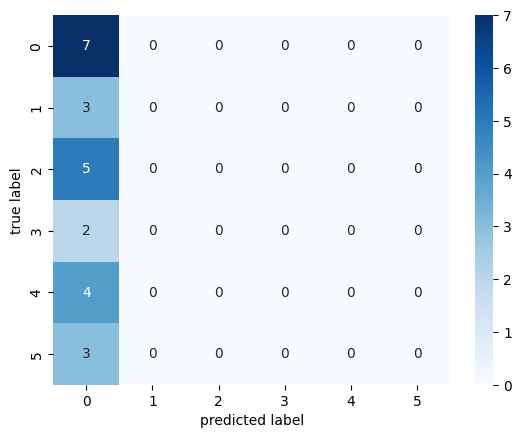

[tensor([[[6.9638e-08, 6.6023e-06, 1.9693e-03,  ..., 2.6768e-06,
          2.0456e-06, 1.6048e-06],
         [6.9638e-08, 6.6023e-06, 1.9693e-03,  ..., 2.6768e-06,
          2.0456e-06, 1.6048e-06],
         [6.9638e-08, 6.6023e-06, 1.9693e-03,  ..., 2.6768e-06,
          2.0456e-06, 1.6048e-06],
         ...,
         [1.4146e-18, 5.0425e-15, 5.2429e-14,  ..., 5.5565e-15,
          3.9434e-14, 4.7983e-14],
         [1.4146e-18, 5.0425e-15, 5.2429e-14,  ..., 5.5565e-15,
          3.9434e-14, 4.7983e-14],
         [1.4146e-18, 5.0425e-15, 5.2429e-14,  ..., 5.5565e-15,
          3.9434e-14, 4.7983e-14]],

        [[2.6344e-08, 2.3968e-08, 2.1646e-03,  ..., 3.8368e-02,
          5.1483e-03, 5.5711e-03],
         [2.6344e-08, 2.3968e-08, 2.1646e-03,  ..., 3.8368e-02,
          5.1483e-03, 5.5711e-03],
         [2.6344e-08, 2.3968e-08, 2.1646e-03,  ..., 3.8368e-02,
          5.1483e-03, 5.5711e-03],
         ...,
         [1.9127e-12, 3.9812e-21, 1.1484e-17,  ..., 2.5031e-14,
          5.67

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.208333  1.000000  0.344828         5
           1   0.000000  0.000000  0.000000         4
           2   0.000000  0.000000  0.000000         6
           3   0.000000  0.000000  0.000000         4
           4   0.000000  0.000000  0.000000         1
           5   0.000000  0.000000  0.000000         4

    accuracy                       0.208333        24
   macro avg   0.034722  0.166667  0.057471        24
weighted avg   0.043403  0.208333  0.071839        24



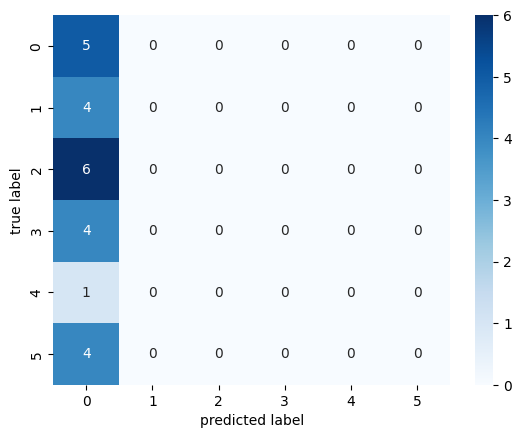

[tensor([[[5.0821e-02, 1.9825e-01, 2.0861e-02,  ..., 1.3102e-02,
          1.4564e-02, 2.4498e-02],
         [5.0821e-02, 1.9825e-01, 2.0861e-02,  ..., 1.3102e-02,
          1.4564e-02, 2.4498e-02],
         [5.0821e-02, 1.9825e-01, 2.0861e-02,  ..., 1.3102e-02,
          1.4564e-02, 2.4498e-02],
         ...,
         [3.7350e-08, 3.1619e-17, 7.5470e-18,  ..., 3.0921e-16,
          8.8934e-17, 5.5997e-17],
         [3.7350e-08, 3.1619e-17, 7.5470e-18,  ..., 3.0921e-16,
          8.8934e-17, 5.5997e-17],
         [3.7350e-08, 3.1619e-17, 7.5470e-18,  ..., 3.0921e-16,
          8.8934e-17, 5.5997e-17]],

        [[2.7817e-02, 8.2143e-02, 7.2376e-02,  ..., 1.1957e-01,
          1.0408e-02, 6.8648e-02],
         [2.7817e-02, 8.2143e-02, 7.2376e-02,  ..., 1.1957e-01,
          1.0408e-02, 6.8648e-02],
         [2.7817e-02, 8.2143e-02, 7.2376e-02,  ..., 1.1957e-01,
          1.0408e-02, 6.8648e-02],
         ...,
         [5.4706e-17, 1.0139e-16, 4.4871e-17,  ..., 1.8818e-16,
          6.50

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.250000  1.000000  0.400000         6
           1   0.000000  0.000000  0.000000         4
           2   0.000000  0.000000  0.000000         6
           3   0.000000  0.000000  0.000000         3
           4   0.000000  0.000000  0.000000         1
           5   0.000000  0.000000  0.000000         4

    accuracy                       0.250000        24
   macro avg   0.041667  0.166667  0.066667        24
weighted avg   0.062500  0.250000  0.100000        24



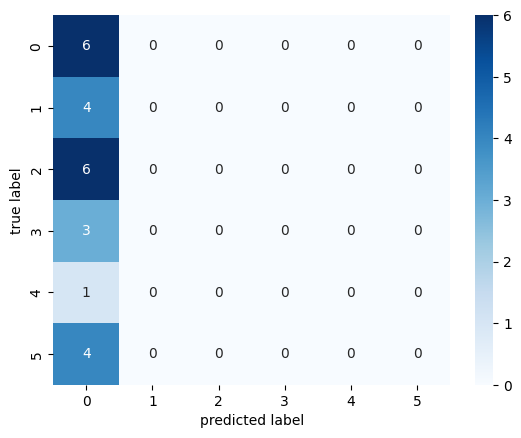

[tensor([[[3.0782e-03, 1.1312e-02, 3.4623e-02,  ..., 1.6087e-02,
          2.7644e-03, 5.5858e-04],
         [3.0782e-03, 1.1312e-02, 3.4623e-02,  ..., 1.6087e-02,
          2.7644e-03, 5.5858e-04],
         [3.0782e-03, 1.1312e-02, 3.4623e-02,  ..., 1.6087e-02,
          2.7644e-03, 5.5858e-04],
         ...,
         [7.5744e-18, 5.3482e-18, 1.2906e-17,  ..., 7.1416e-17,
          4.2691e-17, 2.6041e-17],
         [7.5744e-18, 5.3482e-18, 1.2906e-17,  ..., 7.1416e-17,
          4.2691e-17, 2.6041e-17],
         [7.5744e-18, 5.3482e-18, 1.2906e-17,  ..., 7.1416e-17,
          4.2691e-17, 2.6041e-17]],

        [[1.5054e-02, 9.5802e-02, 8.2165e-01,  ..., 1.7115e-02,
          5.9494e-02, 5.2630e-02],
         [1.5054e-02, 9.5802e-02, 8.2165e-01,  ..., 1.7115e-02,
          5.9494e-02, 5.2630e-02],
         [1.5054e-02, 9.5802e-02, 8.2165e-01,  ..., 1.7115e-02,
          5.9494e-02, 5.2630e-02],
         ...,
         [1.0441e-10, 9.4654e-17, 5.9271e-16,  ..., 9.7519e-15,
          3.13

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.125000  1.000000  0.222222         3
           1   0.000000  0.000000  0.000000         5
           2   0.000000  0.000000  0.000000         4
           3   0.000000  0.000000  0.000000         5
           4   0.000000  0.000000  0.000000         2
           5   0.000000  0.000000  0.000000         5

    accuracy                       0.125000        24
   macro avg   0.020833  0.166667  0.037037        24
weighted avg   0.015625  0.125000  0.027778        24



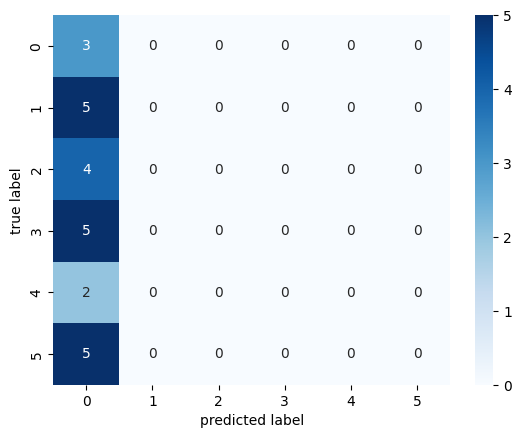

[tensor([[[7.1472e-01, 3.7098e-01, 3.8081e-01,  ..., 3.3862e-01,
          1.6156e-01, 2.5171e-01],
         [7.1472e-01, 3.7098e-01, 3.8081e-01,  ..., 3.3862e-01,
          1.6156e-01, 2.5171e-01],
         [7.1472e-01, 3.7098e-01, 3.8081e-01,  ..., 3.3862e-01,
          1.6156e-01, 2.5171e-01],
         ...,
         [3.1590e-09, 1.6872e-16, 2.3223e-16,  ..., 4.3074e-16,
          1.6389e-16, 2.7987e-16],
         [3.1590e-09, 1.6872e-16, 2.3223e-16,  ..., 4.3074e-16,
          1.6389e-16, 2.7987e-16],
         [3.1590e-09, 1.6872e-16, 2.3223e-16,  ..., 4.3074e-16,
          1.6389e-16, 2.7987e-16]],

        [[3.5940e-01, 7.1945e-02, 5.9846e-02,  ..., 8.9575e-02,
          8.2725e-02, 3.0288e-02],
         [3.5940e-01, 7.1945e-02, 5.9846e-02,  ..., 8.9575e-02,
          8.2725e-02, 3.0288e-02],
         [3.5940e-01, 7.1945e-02, 5.9846e-02,  ..., 8.9575e-02,
          8.2725e-02, 3.0288e-02],
         ...,
         [8.1008e-17, 2.8724e-17, 1.1340e-16,  ..., 3.6307e-16,
          4.50

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.125000  1.000000  0.222222         3
           1   0.000000  0.000000  0.000000         2
           2   0.000000  0.000000  0.000000         4
           3   0.000000  0.000000  0.000000         4
           4   0.000000  0.000000  0.000000         4
           5   0.000000  0.000000  0.000000         7

    accuracy                       0.125000        24
   macro avg   0.020833  0.166667  0.037037        24
weighted avg   0.015625  0.125000  0.027778        24



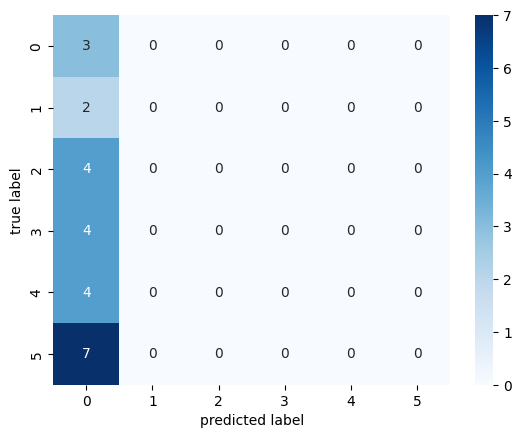

[tensor([[[2.9922e-03, 2.8296e-05, 2.0188e-04,  ..., 2.7623e-03,
          1.1645e-04, 3.6645e-04],
         [2.9922e-03, 2.8296e-05, 2.0188e-04,  ..., 2.7623e-03,
          1.1645e-04, 3.6645e-04],
         [2.9922e-03, 2.8296e-05, 2.0188e-04,  ..., 2.7623e-03,
          1.1645e-04, 3.6645e-04],
         ...,
         [2.8369e-09, 1.6727e-18, 1.8509e-18,  ..., 1.9908e-17,
          3.0200e-17, 1.0042e-17],
         [2.8369e-09, 1.6727e-18, 1.8509e-18,  ..., 1.9908e-17,
          3.0200e-17, 1.0042e-17],
         [2.8369e-09, 1.6727e-18, 1.8509e-18,  ..., 1.9908e-17,
          3.0200e-17, 1.0042e-17]],

        [[5.7784e-04, 8.8732e-03, 7.4023e-03,  ..., 1.9924e-03,
          3.5300e-05, 8.8933e-03],
         [5.7784e-04, 8.8732e-03, 7.4023e-03,  ..., 1.9924e-03,
          3.5300e-05, 8.8933e-03],
         [5.7784e-04, 8.8732e-03, 7.4023e-03,  ..., 1.9924e-03,
          3.5300e-05, 8.8933e-03],
         ...,
         [1.5450e-17, 1.5334e-17, 1.7356e-15,  ..., 1.3900e-16,
          2.95

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.083333  1.000000  0.153846         2
           1   0.000000  0.000000  0.000000         5
           2   0.000000  0.000000  0.000000         6
           3   0.000000  0.000000  0.000000         4
           4   0.000000  0.000000  0.000000         4
           5   0.000000  0.000000  0.000000         3

    accuracy                       0.083333        24
   macro avg   0.013889  0.166667  0.025641        24
weighted avg   0.006944  0.083333  0.012821        24



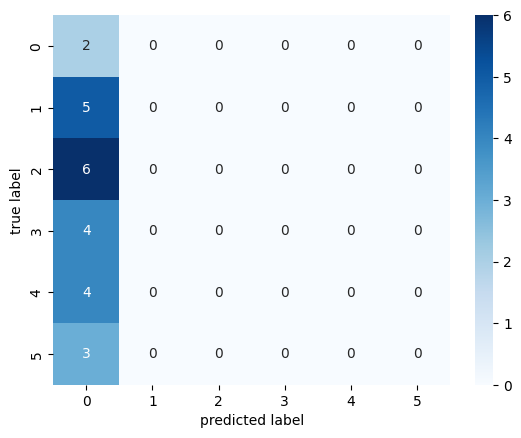

[tensor([[[1.7334e-01, 2.0686e-01, 7.9285e-03,  ..., 4.7680e-02,
          3.1861e-02, 2.8676e-02],
         [1.7334e-01, 2.0686e-01, 7.9285e-03,  ..., 4.7680e-02,
          3.1861e-02, 2.8676e-02],
         [1.7334e-01, 2.0686e-01, 7.9285e-03,  ..., 4.7680e-02,
          3.1861e-02, 2.8676e-02],
         ...,
         [1.0696e-16, 5.1472e-17, 3.6211e-17,  ..., 3.6978e-14,
          3.7473e-14, 3.9598e-14],
         [1.0696e-16, 5.1472e-17, 3.6211e-17,  ..., 3.6978e-14,
          3.7473e-14, 3.9598e-14],
         [1.0696e-16, 5.1472e-17, 3.6211e-17,  ..., 3.6978e-14,
          3.7473e-14, 3.9598e-14]],

        [[5.3256e-02, 9.2322e-03, 1.9343e-02,  ..., 7.8210e-03,
          2.8376e-02, 1.2406e-02],
         [5.3256e-02, 9.2322e-03, 1.9343e-02,  ..., 7.8210e-03,
          2.8376e-02, 1.2406e-02],
         [5.3256e-02, 9.2322e-03, 1.9343e-02,  ..., 7.8210e-03,
          2.8376e-02, 1.2406e-02],
         ...,
         [4.5256e-09, 1.6326e-17, 1.6644e-14,  ..., 2.6298e-15,
          2.96

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.083333  1.000000  0.153846         2
           1   0.000000  0.000000  0.000000         4
           2   0.000000  0.000000  0.000000         5
           3   0.000000  0.000000  0.000000         3
           4   0.000000  0.000000  0.000000         5
           5   0.000000  0.000000  0.000000         5

    accuracy                       0.083333        24
   macro avg   0.013889  0.166667  0.025641        24
weighted avg   0.006944  0.083333  0.012821        24



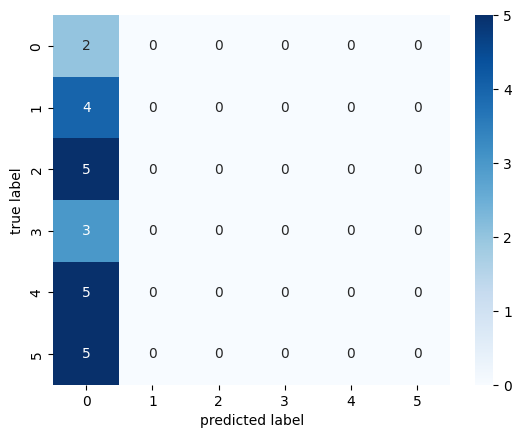

[tensor([[[2.3174e-08, 3.1651e-05, 2.8674e-04,  ..., 1.2338e-03,
          7.0325e-04, 1.9840e-03],
         [2.3174e-08, 3.1651e-05, 2.8674e-04,  ..., 1.2338e-03,
          7.0325e-04, 1.9840e-03],
         [2.3174e-08, 3.1651e-05, 2.8674e-04,  ..., 1.2338e-03,
          7.0325e-04, 1.9840e-03],
         ...,
         [3.4355e-21, 1.1197e-17, 9.9000e-18,  ..., 1.0980e-16,
          6.5819e-17, 1.1944e-16],
         [3.4355e-21, 1.1197e-17, 9.9000e-18,  ..., 1.0980e-16,
          6.5819e-17, 1.1944e-16],
         [3.4355e-21, 1.1197e-17, 9.9000e-18,  ..., 1.0980e-16,
          6.5819e-17, 1.1944e-16]],

        [[1.0259e-03, 7.7915e-03, 4.0228e-03,  ..., 1.8117e-02,
          2.7874e-03, 6.0901e-03],
         [1.0259e-03, 7.7915e-03, 4.0228e-03,  ..., 1.8117e-02,
          2.7874e-03, 6.0901e-03],
         [1.0259e-03, 7.7915e-03, 4.0228e-03,  ..., 1.8117e-02,
          2.7874e-03, 6.0901e-03],
         ...,
         [2.4243e-09, 3.9219e-18, 3.2986e-17,  ..., 5.9974e-17,
          1.79

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.125000  1.000000  0.222222         3
           1   0.000000  0.000000  0.000000         8
           2   0.000000  0.000000  0.000000         2
           3   0.000000  0.000000  0.000000         3
           4   0.000000  0.000000  0.000000         6
           5   0.000000  0.000000  0.000000         2

    accuracy                       0.125000        24
   macro avg   0.020833  0.166667  0.037037        24
weighted avg   0.015625  0.125000  0.027778        24



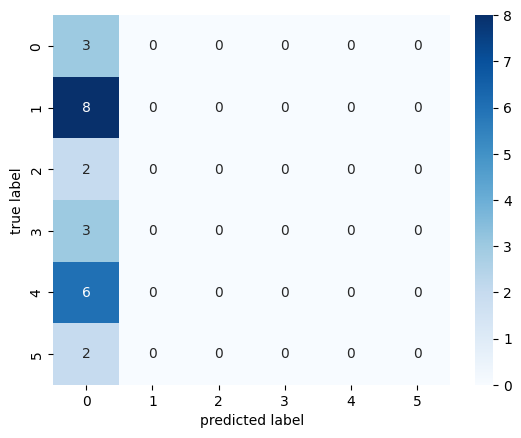

[tensor([[[2.8201e-03, 7.9032e-02, 2.6822e-02,  ..., 8.4160e-02,
          5.0737e-02, 4.9775e-02],
         [2.8201e-03, 7.9032e-02, 2.6822e-02,  ..., 8.4160e-02,
          5.0737e-02, 4.9775e-02],
         [2.8201e-03, 7.9032e-02, 2.6822e-02,  ..., 8.4160e-02,
          5.0737e-02, 4.9775e-02],
         ...,
         [2.1417e-17, 1.4224e-15, 2.8651e-15,  ..., 6.8797e-17,
          7.1332e-17, 2.5896e-17],
         [2.1417e-17, 1.4224e-15, 2.8651e-15,  ..., 6.8797e-17,
          7.1332e-17, 2.5896e-17],
         [2.1417e-17, 1.4224e-15, 2.8651e-15,  ..., 6.8797e-17,
          7.1332e-17, 2.5896e-17]],

        [[6.9245e-03, 2.6449e-03, 1.5198e-02,  ..., 1.5547e-02,
          2.5415e-02, 9.1119e-03],
         [6.9245e-03, 2.6449e-03, 1.5198e-02,  ..., 1.5547e-02,
          2.5415e-02, 9.1119e-03],
         [6.9245e-03, 2.6449e-03, 1.5198e-02,  ..., 1.5547e-02,
          2.5415e-02, 9.1119e-03],
         ...,
         [9.9356e-18, 1.3869e-16, 3.7332e-15,  ..., 1.5019e-17,
          2.11

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.041667  1.000000  0.080000         1
           1   0.000000  0.000000  0.000000         4
           2   0.000000  0.000000  0.000000         2
           3   0.000000  0.000000  0.000000         3
           4   0.000000  0.000000  0.000000         9
           5   0.000000  0.000000  0.000000         5

    accuracy                       0.041667        24
   macro avg   0.006944  0.166667  0.013333        24
weighted avg   0.001736  0.041667  0.003333        24



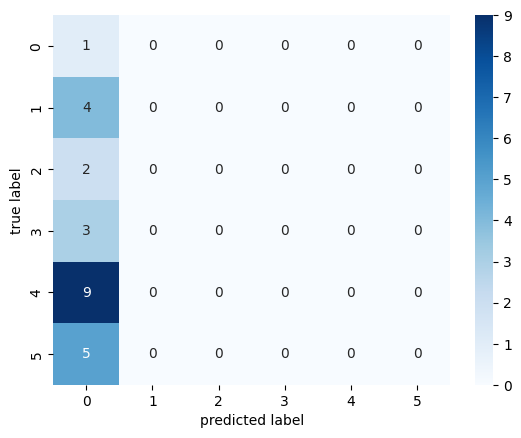

[tensor([[[1.7211e-02, 3.6383e-04, 2.7996e-03,  ..., 5.3350e-03,
          1.2936e-03, 1.9494e-03],
         [1.7211e-02, 3.6383e-04, 2.7996e-03,  ..., 5.3350e-03,
          1.2936e-03, 1.9494e-03],
         [1.7211e-02, 3.6383e-04, 2.7996e-03,  ..., 5.3350e-03,
          1.2936e-03, 1.9494e-03],
         ...,
         [1.4422e-17, 1.3400e-15, 2.2968e-14,  ..., 1.2537e-15,
          2.4588e-15, 7.8959e-16],
         [1.4422e-17, 1.3400e-15, 2.2968e-14,  ..., 1.2537e-15,
          2.4588e-15, 7.8959e-16],
         [1.4422e-17, 1.3400e-15, 2.2968e-14,  ..., 1.2537e-15,
          2.4588e-15, 7.8959e-16]],

        [[7.2781e-04, 2.2221e-05, 1.9415e-04,  ..., 2.3732e-03,
          2.8703e-03, 3.2206e-03],
         [7.2781e-04, 2.2221e-05, 1.9415e-04,  ..., 2.3732e-03,
          2.8703e-03, 3.2206e-03],
         [7.2781e-04, 2.2221e-05, 1.9415e-04,  ..., 2.3732e-03,
          2.8703e-03, 3.2206e-03],
         ...,
         [4.7046e-17, 2.8191e-17, 1.1578e-17,  ..., 1.2077e-14,
          1.17

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.166667  1.000000  0.285714         4
           1   0.000000  0.000000  0.000000         4
           2   0.000000  0.000000  0.000000         6
           3   0.000000  0.000000  0.000000         4
           4   0.000000  0.000000  0.000000         1
           5   0.000000  0.000000  0.000000         5

    accuracy                       0.166667        24
   macro avg   0.027778  0.166667  0.047619        24
weighted avg   0.027778  0.166667  0.047619        24



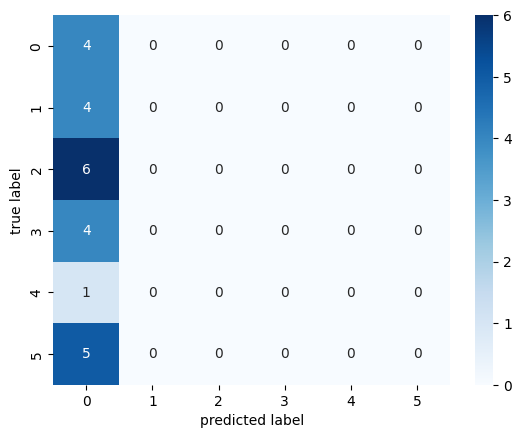

[tensor([[[1.2753e-06, 6.3391e-08, 3.7004e-07,  ..., 3.8542e-03,
          7.0218e-04, 1.4275e-03],
         [1.2753e-06, 6.3391e-08, 3.7004e-07,  ..., 3.8542e-03,
          7.0218e-04, 1.4275e-03],
         [1.2753e-06, 6.3391e-08, 3.7004e-07,  ..., 3.8542e-03,
          7.0218e-04, 1.4275e-03],
         ...,
         [1.2460e-17, 4.1552e-18, 1.7344e-18,  ..., 2.3559e-18,
          1.3962e-18, 8.9602e-19],
         [1.2460e-17, 4.1552e-18, 1.7344e-18,  ..., 2.3559e-18,
          1.3962e-18, 8.9602e-19],
         [1.2460e-17, 4.1552e-18, 1.7344e-18,  ..., 2.3559e-18,
          1.3962e-18, 8.9602e-19]],

        [[1.1923e-02, 6.1404e-04, 1.4717e-03,  ..., 7.6586e-06,
          2.1365e-05, 1.4115e-05],
         [1.1923e-02, 6.1404e-04, 1.4717e-03,  ..., 7.6586e-06,
          2.1365e-05, 1.4115e-05],
         [1.1923e-02, 6.1404e-04, 1.4717e-03,  ..., 7.6586e-06,
          2.1365e-05, 1.4115e-05],
         ...,
         [1.9261e-07, 4.2739e-15, 4.5792e-14,  ..., 1.9019e-15,
          3.75

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.166667  1.000000  0.285714         4
           1   0.000000  0.000000  0.000000         1
           2   0.000000  0.000000  0.000000         9
           3   0.000000  0.000000  0.000000         3
           4   0.000000  0.000000  0.000000         4
           5   0.000000  0.000000  0.000000         3

    accuracy                       0.166667        24
   macro avg   0.027778  0.166667  0.047619        24
weighted avg   0.027778  0.166667  0.047619        24



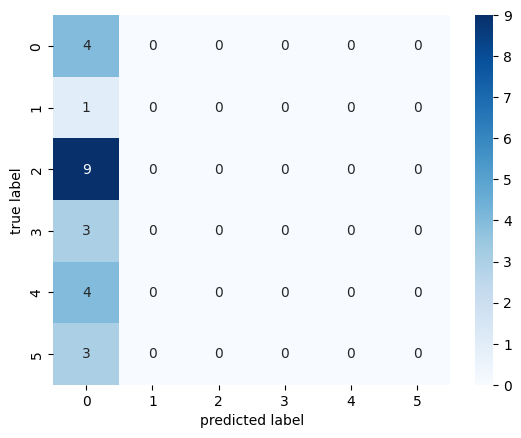

[tensor([[[1.1584e-01, 1.3630e-01, 6.3582e-02,  ..., 1.5845e-01,
          1.0291e-01, 6.8404e-02],
         [1.1584e-01, 1.3630e-01, 6.3582e-02,  ..., 1.5845e-01,
          1.0291e-01, 6.8404e-02],
         [1.1584e-01, 1.3630e-01, 6.3582e-02,  ..., 1.5845e-01,
          1.0291e-01, 6.8404e-02],
         ...,
         [4.9241e-17, 2.8677e-17, 3.5363e-17,  ..., 4.1920e-15,
          8.1809e-16, 5.3367e-17],
         [4.9241e-17, 2.8677e-17, 3.5363e-17,  ..., 4.1920e-15,
          8.1809e-16, 5.3367e-17],
         [4.9241e-17, 2.8677e-17, 3.5363e-17,  ..., 4.1920e-15,
          8.1809e-16, 5.3367e-17]],

        [[5.7554e-02, 9.3032e-03, 1.2463e-02,  ..., 1.4136e-03,
          5.4730e-03, 4.2253e-03],
         [5.7554e-02, 9.3032e-03, 1.2463e-02,  ..., 1.4136e-03,
          5.4730e-03, 4.2253e-03],
         [5.7554e-02, 9.3032e-03, 1.2463e-02,  ..., 1.4136e-03,
          5.4730e-03, 4.2253e-03],
         ...,
         [9.8290e-18, 8.5782e-18, 9.5170e-18,  ..., 1.3305e-15,
          9.47

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.208333  1.000000  0.344828         5
           1   0.000000  0.000000  0.000000         5
           2   0.000000  0.000000  0.000000         5
           3   0.000000  0.000000  0.000000         1
           4   0.000000  0.000000  0.000000         1
           5   0.000000  0.000000  0.000000         7

    accuracy                       0.208333        24
   macro avg   0.034722  0.166667  0.057471        24
weighted avg   0.043403  0.208333  0.071839        24



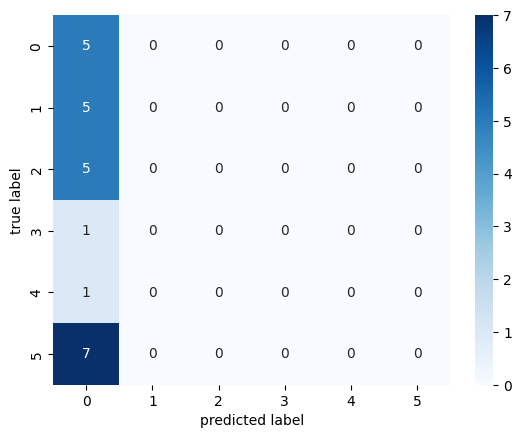

[tensor([[[1.2373e-02, 2.6471e-02, 2.0732e-02,  ..., 8.8589e-02,
          6.5980e-02, 1.6897e-01],
         [1.2373e-02, 2.6471e-02, 2.0732e-02,  ..., 8.8589e-02,
          6.5980e-02, 1.6897e-01],
         [1.2373e-02, 2.6471e-02, 2.0732e-02,  ..., 8.8589e-02,
          6.5980e-02, 1.6897e-01],
         ...,
         [3.3163e-17, 2.3789e-17, 9.2135e-18,  ..., 1.3331e-14,
          1.6159e-14, 1.0708e-14],
         [3.3163e-17, 2.3789e-17, 9.2135e-18,  ..., 1.3331e-14,
          1.6159e-14, 1.0708e-14],
         [3.3163e-17, 2.3789e-17, 9.2135e-18,  ..., 1.3331e-14,
          1.6159e-14, 1.0708e-14]],

        [[1.1535e-02, 1.3948e-03, 4.7907e-03,  ..., 2.4602e-03,
          3.4071e-03, 7.6363e-03],
         [1.1535e-02, 1.3948e-03, 4.7907e-03,  ..., 2.4602e-03,
          3.4071e-03, 7.6363e-03],
         [1.1535e-02, 1.3948e-03, 4.7907e-03,  ..., 2.4602e-03,
          3.4071e-03, 7.6363e-03],
         ...,
         [1.2174e-09, 3.1142e-15, 7.3685e-15,  ..., 8.8781e-17,
          2.51

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.208333  1.000000  0.344828         5
           1   0.000000  0.000000  0.000000         2
           2   0.000000  0.000000  0.000000         3
           3   0.000000  0.000000  0.000000         5
           4   0.000000  0.000000  0.000000         4
           5   0.000000  0.000000  0.000000         5

    accuracy                       0.208333        24
   macro avg   0.034722  0.166667  0.057471        24
weighted avg   0.043403  0.208333  0.071839        24



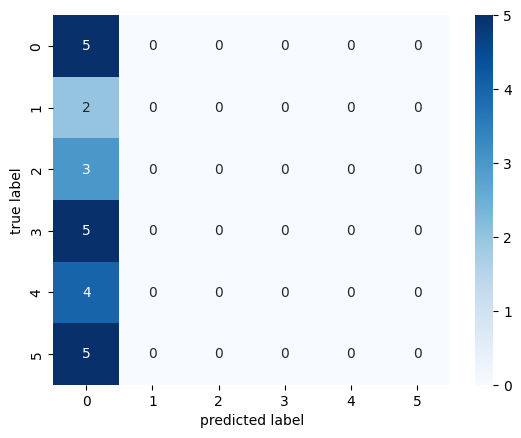

[tensor([[[2.6832e-03, 6.1943e-03, 3.1799e-03,  ..., 1.0548e-01,
          6.9245e-02, 1.0452e-01],
         [2.6832e-03, 6.1943e-03, 3.1799e-03,  ..., 1.0548e-01,
          6.9245e-02, 1.0452e-01],
         [2.6832e-03, 6.1943e-03, 3.1799e-03,  ..., 1.0548e-01,
          6.9245e-02, 1.0452e-01],
         ...,
         [2.7350e-09, 7.7380e-17, 3.3691e-16,  ..., 6.2376e-17,
          1.0070e-16, 6.6580e-16],
         [2.7350e-09, 7.7380e-17, 3.3691e-16,  ..., 6.2376e-17,
          1.0070e-16, 6.6580e-16],
         [2.7350e-09, 7.7380e-17, 3.3691e-16,  ..., 6.2376e-17,
          1.0070e-16, 6.6580e-16]],

        [[1.0833e-02, 1.5240e-02, 7.0849e-04,  ..., 4.3160e-03,
          4.6337e-03, 9.8025e-03],
         [1.0833e-02, 1.5240e-02, 7.0849e-04,  ..., 4.3160e-03,
          4.6337e-03, 9.8025e-03],
         [1.0833e-02, 1.5240e-02, 7.0849e-04,  ..., 4.3160e-03,
          4.6337e-03, 9.8025e-03],
         ...,
         [2.4353e-17, 1.0615e-17, 3.9510e-17,  ..., 1.1470e-15,
          2.43

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000       0.0
           1   0.000000  0.000000  0.000000       5.0
           2   0.000000  0.000000  0.000000       6.0
           3   0.000000  0.000000  0.000000       3.0
           4   0.000000  0.000000  0.000000       7.0
           5   0.000000  0.000000  0.000000       3.0

    accuracy                       0.000000      24.0
   macro avg   0.000000  0.000000  0.000000      24.0
weighted avg   0.000000  0.000000  0.000000      24.0



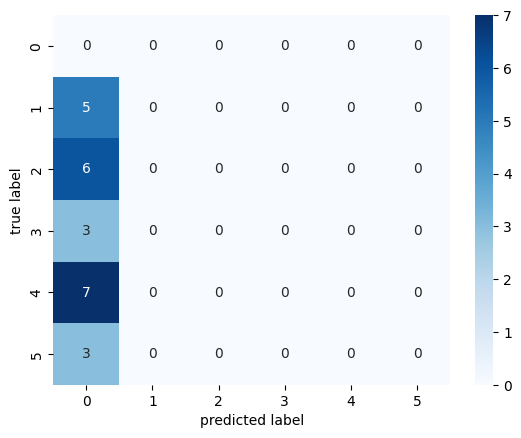

[tensor([[[1.0150e-02, 8.6343e-03, 1.7592e-02,  ..., 1.6430e-04,
          3.2082e-04, 5.5461e-03],
         [1.0150e-02, 8.6343e-03, 1.7592e-02,  ..., 1.6430e-04,
          3.2082e-04, 5.5461e-03],
         [1.0150e-02, 8.6343e-03, 1.7592e-02,  ..., 1.6430e-04,
          3.2082e-04, 5.5461e-03],
         ...,
         [6.6999e-09, 3.2149e-17, 2.9714e-17,  ..., 6.3080e-15,
          4.3032e-15, 1.0476e-14],
         [6.6999e-09, 3.2149e-17, 2.9714e-17,  ..., 6.3080e-15,
          4.3032e-15, 1.0476e-14],
         [6.6999e-09, 3.2149e-17, 2.9714e-17,  ..., 6.3080e-15,
          4.3032e-15, 1.0476e-14]],

        [[2.3358e-02, 3.0908e-04, 3.5586e-03,  ..., 1.7215e-02,
          6.5375e-02, 1.3692e-01],
         [2.3358e-02, 3.0908e-04, 3.5586e-03,  ..., 1.7215e-02,
          6.5375e-02, 1.3692e-01],
         [2.3358e-02, 3.0908e-04, 3.5586e-03,  ..., 1.7215e-02,
          6.5375e-02, 1.3692e-01],
         ...,
         [5.8272e-10, 3.8871e-17, 7.9444e-17,  ..., 4.5070e-16,
          7.85

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.166667  1.000000  0.285714         4
           1   0.000000  0.000000  0.000000         5
           2   0.000000  0.000000  0.000000         4
           3   0.000000  0.000000  0.000000         5
           4   0.000000  0.000000  0.000000         4
           5   0.000000  0.000000  0.000000         2

    accuracy                       0.166667        24
   macro avg   0.027778  0.166667  0.047619        24
weighted avg   0.027778  0.166667  0.047619        24



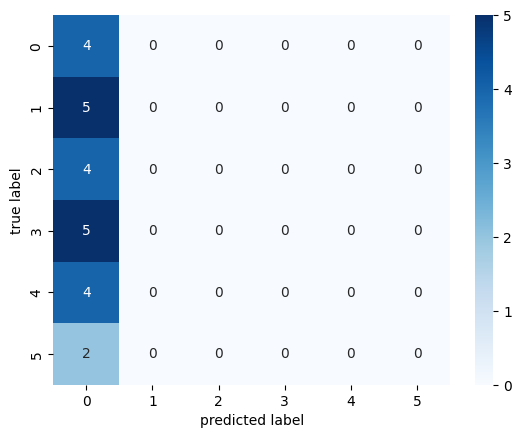

[tensor([[[1.4660e-02, 1.5454e-03, 4.3982e-01,  ..., 4.2200e-01,
          2.1401e-01, 1.3446e-01],
         [1.4660e-02, 1.5454e-03, 4.3982e-01,  ..., 4.2200e-01,
          2.1401e-01, 1.3446e-01],
         [1.4660e-02, 1.5454e-03, 4.3982e-01,  ..., 4.2200e-01,
          2.1401e-01, 1.3446e-01],
         ...,
         [7.8755e-18, 5.8453e-16, 3.4066e-15,  ..., 1.6824e-16,
          1.4919e-16, 3.2708e-16],
         [7.8755e-18, 5.8453e-16, 3.4066e-15,  ..., 1.6824e-16,
          1.4919e-16, 3.2708e-16],
         [7.8755e-18, 5.8453e-16, 3.4066e-15,  ..., 1.6824e-16,
          1.4919e-16, 3.2708e-16]],

        [[1.7211e-02, 3.6383e-04, 2.7996e-03,  ..., 5.3350e-03,
          1.2936e-03, 1.9494e-03],
         [1.7211e-02, 3.6383e-04, 2.7996e-03,  ..., 5.3350e-03,
          1.2936e-03, 1.9494e-03],
         [1.7211e-02, 3.6383e-04, 2.7996e-03,  ..., 5.3350e-03,
          1.2936e-03, 1.9494e-03],
         ...,
         [1.4422e-17, 1.3400e-15, 2.2968e-14,  ..., 1.2537e-15,
          2.45

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.041667  1.000000  0.080000         1
           1   0.000000  0.000000  0.000000         3
           2   0.000000  0.000000  0.000000         4
           3   0.000000  0.000000  0.000000         5
           4   0.000000  0.000000  0.000000         7
           5   0.000000  0.000000  0.000000         4

    accuracy                       0.041667        24
   macro avg   0.006944  0.166667  0.013333        24
weighted avg   0.001736  0.041667  0.003333        24



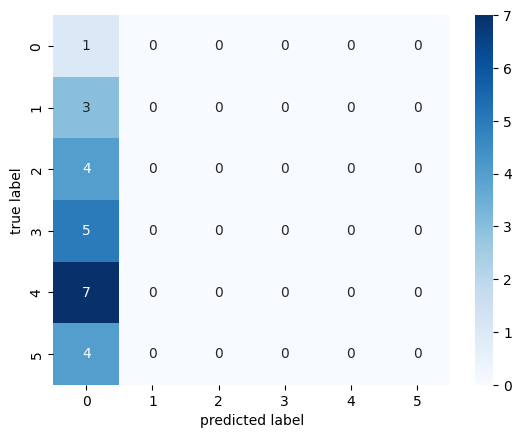

[tensor([[[1.6592e-04, 3.2597e-03, 1.2433e-03,  ..., 5.0053e-03,
          1.5034e-03, 2.6621e-04],
         [1.6592e-04, 3.2597e-03, 1.2433e-03,  ..., 5.0053e-03,
          1.5034e-03, 2.6621e-04],
         [1.6592e-04, 3.2597e-03, 1.2433e-03,  ..., 5.0053e-03,
          1.5034e-03, 2.6621e-04],
         ...,
         [1.0752e-16, 2.2527e-15, 1.1604e-15,  ..., 5.2804e-15,
          4.9375e-15, 5.3201e-15],
         [1.0752e-16, 2.2527e-15, 1.1604e-15,  ..., 5.2804e-15,
          4.9375e-15, 5.3201e-15],
         [1.0752e-16, 2.2527e-15, 1.1604e-15,  ..., 5.2804e-15,
          4.9375e-15, 5.3201e-15]],

        [[5.0180e-02, 3.8133e-03, 1.9779e-03,  ..., 2.8868e-04,
          5.2793e-04, 4.0952e-03],
         [5.0180e-02, 3.8133e-03, 1.9779e-03,  ..., 2.8868e-04,
          5.2793e-04, 4.0952e-03],
         [5.0180e-02, 3.8133e-03, 1.9779e-03,  ..., 2.8868e-04,
          5.2793e-04, 4.0952e-03],
         ...,
         [1.1622e-16, 5.1730e-17, 8.1515e-17,  ..., 2.1921e-16,
          7.39

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.208333  1.000000  0.344828         5
           1   0.000000  0.000000  0.000000         3
           2   0.000000  0.000000  0.000000         5
           3   0.000000  0.000000  0.000000         2
           4   0.000000  0.000000  0.000000         5
           5   0.000000  0.000000  0.000000         4

    accuracy                       0.208333        24
   macro avg   0.034722  0.166667  0.057471        24
weighted avg   0.043403  0.208333  0.071839        24



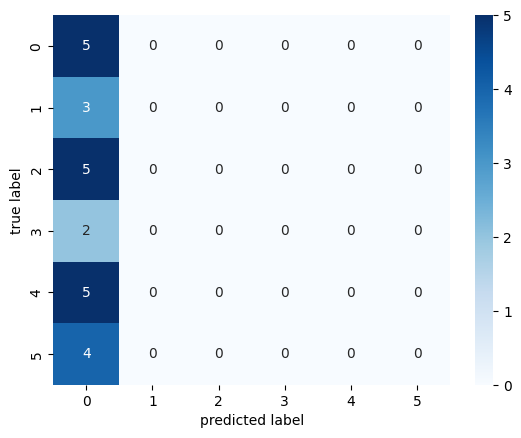

[tensor([[[3.3797e-03, 7.3968e-02, 1.6680e-02,  ..., 4.1439e-01,
          2.0966e-02, 1.1665e-03],
         [3.3797e-03, 7.3968e-02, 1.6680e-02,  ..., 4.1439e-01,
          2.0966e-02, 1.1665e-03],
         [3.3797e-03, 7.3968e-02, 1.6680e-02,  ..., 4.1439e-01,
          2.0966e-02, 1.1665e-03],
         ...,
         [5.4407e-16, 4.0965e-17, 1.4269e-17,  ..., 1.3140e-16,
          2.2258e-17, 1.6201e-17],
         [5.4407e-16, 4.0965e-17, 1.4269e-17,  ..., 1.3140e-16,
          2.2258e-17, 1.6201e-17],
         [5.4407e-16, 4.0965e-17, 1.4269e-17,  ..., 1.3140e-16,
          2.2258e-17, 1.6201e-17]],

        [[1.1444e-01, 6.6742e-03, 9.0594e-03,  ..., 1.3339e-02,
          1.8079e-02, 1.5995e-02],
         [1.1444e-01, 6.6742e-03, 9.0594e-03,  ..., 1.3339e-02,
          1.8079e-02, 1.5995e-02],
         [1.1444e-01, 6.6742e-03, 9.0594e-03,  ..., 1.3339e-02,
          1.8079e-02, 1.5995e-02],
         ...,
         [2.3883e-16, 4.3714e-16, 9.9779e-15,  ..., 1.4346e-17,
          2.55

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.208333  1.000000  0.344828         5
           1   0.000000  0.000000  0.000000         6
           2   0.000000  0.000000  0.000000         2
           3   0.000000  0.000000  0.000000         3
           4   0.000000  0.000000  0.000000         6
           5   0.000000  0.000000  0.000000         2

    accuracy                       0.208333        24
   macro avg   0.034722  0.166667  0.057471        24
weighted avg   0.043403  0.208333  0.071839        24



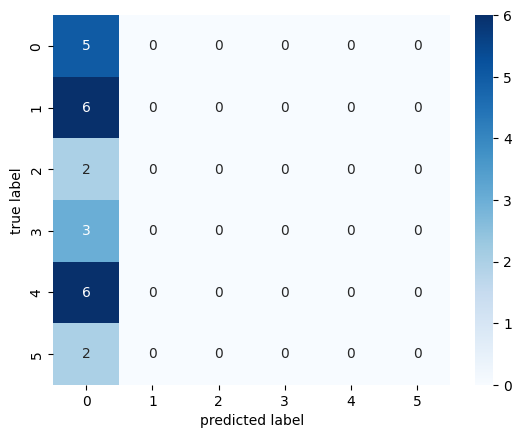

[tensor([[[5.6254e-03, 2.1128e-02, 2.7983e-04,  ..., 1.8657e-02,
          1.9850e-02, 7.4593e-03],
         [5.6254e-03, 2.1128e-02, 2.7983e-04,  ..., 1.8657e-02,
          1.9850e-02, 7.4593e-03],
         [5.6254e-03, 2.1128e-02, 2.7983e-04,  ..., 1.8657e-02,
          1.9850e-02, 7.4593e-03],
         ...,
         [9.6448e-10, 1.8340e-17, 2.4478e-16,  ..., 3.6749e-14,
          3.4268e-14, 6.6987e-15],
         [9.6448e-10, 1.8340e-17, 2.4478e-16,  ..., 3.6749e-14,
          3.4268e-14, 6.6987e-15],
         [9.6448e-10, 1.8340e-17, 2.4478e-16,  ..., 3.6749e-14,
          3.4268e-14, 6.6987e-15]],

        [[5.1879e-04, 1.3840e-02, 1.4625e-03,  ..., 2.6614e-04,
          2.6876e-04, 2.2422e-03],
         [5.1879e-04, 1.3840e-02, 1.4625e-03,  ..., 2.6614e-04,
          2.6876e-04, 2.2422e-03],
         [5.1879e-04, 1.3840e-02, 1.4625e-03,  ..., 2.6614e-04,
          2.6876e-04, 2.2422e-03],
         ...,
         [1.1391e-17, 1.0178e-17, 9.3817e-18,  ..., 4.9065e-15,
          3.59

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.166667  1.000000  0.285714         4
           1   0.000000  0.000000  0.000000         4
           2   0.000000  0.000000  0.000000         4
           3   0.000000  0.000000  0.000000         4
           4   0.000000  0.000000  0.000000         4
           5   0.000000  0.000000  0.000000         4

    accuracy                       0.166667        24
   macro avg   0.027778  0.166667  0.047619        24
weighted avg   0.027778  0.166667  0.047619        24



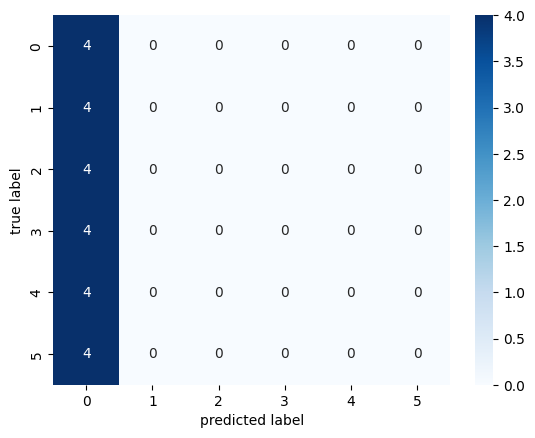

[tensor([[[5.9732e-02, 1.4568e-02, 2.6239e-02,  ..., 3.1181e-02,
          3.3388e-02, 2.3887e-02],
         [5.9732e-02, 1.4568e-02, 2.6239e-02,  ..., 3.1181e-02,
          3.3388e-02, 2.3887e-02],
         [5.9732e-02, 1.4568e-02, 2.6239e-02,  ..., 3.1181e-02,
          3.3388e-02, 2.3887e-02],
         ...,
         [7.9225e-17, 7.8434e-17, 5.2835e-17,  ..., 5.0980e-17,
          3.3076e-17, 5.7679e-17],
         [7.9225e-17, 7.8434e-17, 5.2835e-17,  ..., 5.0980e-17,
          3.3076e-17, 5.7679e-17],
         [7.9225e-17, 7.8434e-17, 5.2835e-17,  ..., 5.0980e-17,
          3.3076e-17, 5.7679e-17]],

        [[1.2749e-04, 4.0093e-05, 7.5878e-04,  ..., 4.1380e-05,
          9.8669e-05, 1.6732e-04],
         [1.2749e-04, 4.0093e-05, 7.5878e-04,  ..., 4.1380e-05,
          9.8669e-05, 1.6732e-04],
         [1.2749e-04, 4.0093e-05, 7.5878e-04,  ..., 4.1380e-05,
          9.8669e-05, 1.6732e-04],
         ...,
         [2.0199e-10, 2.0225e-17, 8.1181e-16,  ..., 5.6026e-17,
          5.20

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000       0.0
           1   0.000000  0.000000  0.000000       3.0
           2   0.000000  0.000000  0.000000       8.0
           3   0.000000  0.000000  0.000000       9.0
           4   0.000000  0.000000  0.000000       3.0
           5   0.000000  0.000000  0.000000       1.0

    accuracy                       0.000000      24.0
   macro avg   0.000000  0.000000  0.000000      24.0
weighted avg   0.000000  0.000000  0.000000      24.0



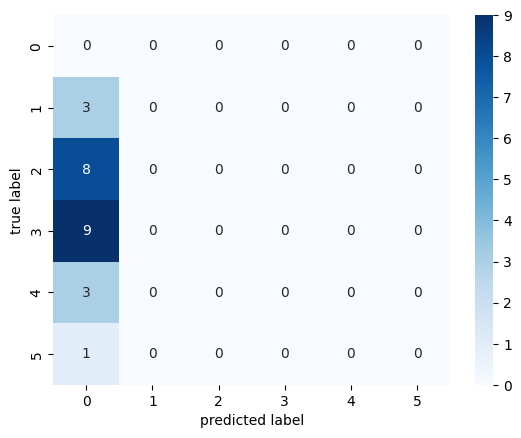

[tensor([[[9.5366e-03, 6.4068e-04, 3.2758e-02,  ..., 8.7389e-02,
          3.3833e-02, 3.5984e-02],
         [9.5366e-03, 6.4068e-04, 3.2758e-02,  ..., 8.7389e-02,
          3.3833e-02, 3.5984e-02],
         [9.5366e-03, 6.4068e-04, 3.2758e-02,  ..., 8.7389e-02,
          3.3833e-02, 3.5984e-02],
         ...,
         [7.1396e-09, 1.6489e-15, 4.0885e-14,  ..., 2.5334e-17,
          2.6817e-17, 5.1817e-17],
         [7.1396e-09, 1.6489e-15, 4.0885e-14,  ..., 2.5334e-17,
          2.6817e-17, 5.1817e-17],
         [7.1396e-09, 1.6489e-15, 4.0885e-14,  ..., 2.5334e-17,
          2.6817e-17, 5.1817e-17]],

        [[1.7137e-02, 4.5159e-03, 1.8501e-03,  ..., 2.7495e-04,
          3.6026e-04, 1.9184e-04],
         [1.7137e-02, 4.5159e-03, 1.8501e-03,  ..., 2.7495e-04,
          3.6026e-04, 1.9184e-04],
         [1.7137e-02, 4.5159e-03, 1.8501e-03,  ..., 2.7495e-04,
          3.6026e-04, 1.9184e-04],
         ...,
         [4.3643e-16, 6.2294e-15, 2.1901e-14,  ..., 5.9147e-15,
          2.99

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.041667  1.000000  0.080000         1
           1   0.000000  0.000000  0.000000         2
           2   0.000000  0.000000  0.000000         4
           3   0.000000  0.000000  0.000000         6
           4   0.000000  0.000000  0.000000         7
           5   0.000000  0.000000  0.000000         4

    accuracy                       0.041667        24
   macro avg   0.006944  0.166667  0.013333        24
weighted avg   0.001736  0.041667  0.003333        24



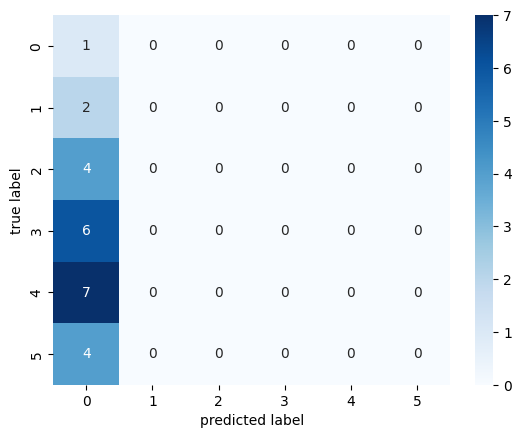

[tensor([[[2.1882e-02, 7.4402e-03, 1.6608e-03,  ..., 1.0981e-02,
          6.2956e-03, 5.9145e-02],
         [2.1882e-02, 7.4402e-03, 1.6608e-03,  ..., 1.0981e-02,
          6.2956e-03, 5.9145e-02],
         [2.1882e-02, 7.4402e-03, 1.6608e-03,  ..., 1.0981e-02,
          6.2956e-03, 5.9145e-02],
         ...,
         [1.3915e-07, 3.8485e-14, 7.3722e-14,  ..., 2.6303e-16,
          1.1119e-16, 1.4123e-16],
         [1.3915e-07, 3.8485e-14, 7.3722e-14,  ..., 2.6303e-16,
          1.1119e-16, 1.4123e-16],
         [1.3915e-07, 3.8485e-14, 7.3722e-14,  ..., 2.6303e-16,
          1.1119e-16, 1.4123e-16]],

        [[2.8457e-03, 1.4014e-02, 1.7836e-03,  ..., 9.7864e-04,
          1.4785e-02, 2.2802e-03],
         [2.8457e-03, 1.4014e-02, 1.7836e-03,  ..., 9.7864e-04,
          1.4785e-02, 2.2802e-03],
         [2.8457e-03, 1.4014e-02, 1.7836e-03,  ..., 9.7864e-04,
          1.4785e-02, 2.2802e-03],
         ...,
         [4.6426e-16, 1.0860e-14, 3.5245e-14,  ..., 7.8750e-17,
          2.72

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.208333  1.000000  0.344828         5
           1   0.000000  0.000000  0.000000         4
           2   0.000000  0.000000  0.000000         5
           3   0.000000  0.000000  0.000000         1
           4   0.000000  0.000000  0.000000         5
           5   0.000000  0.000000  0.000000         4

    accuracy                       0.208333        24
   macro avg   0.034722  0.166667  0.057471        24
weighted avg   0.043403  0.208333  0.071839        24



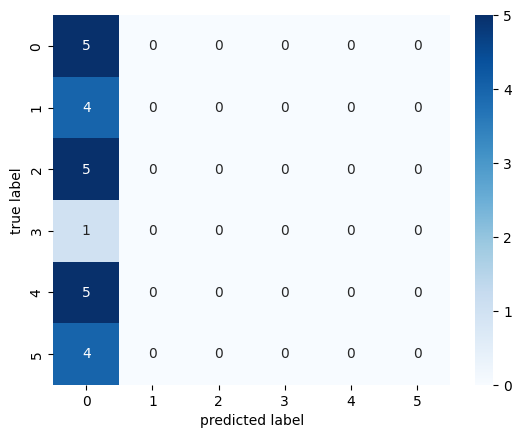

[tensor([[[2.1575e-03, 1.1265e-02, 1.8499e-03,  ..., 2.5999e-02,
          8.3272e-03, 1.5258e-02],
         [2.1575e-03, 1.1265e-02, 1.8499e-03,  ..., 2.5999e-02,
          8.3272e-03, 1.5258e-02],
         [2.1575e-03, 1.1265e-02, 1.8499e-03,  ..., 2.5999e-02,
          8.3272e-03, 1.5258e-02],
         ...,
         [4.6022e-14, 2.1275e-14, 8.1266e-14,  ..., 1.6254e-14,
          3.2326e-15, 1.8168e-15],
         [4.6022e-14, 2.1275e-14, 8.1266e-14,  ..., 1.6254e-14,
          3.2326e-15, 1.8168e-15],
         [4.6022e-14, 2.1275e-14, 8.1266e-14,  ..., 1.6254e-14,
          3.2326e-15, 1.8168e-15]],

        [[3.4459e-04, 1.3116e-03, 7.8818e-04,  ..., 1.5579e-03,
          1.9439e-03, 2.9745e-02],
         [3.4459e-04, 1.3116e-03, 7.8818e-04,  ..., 1.5579e-03,
          1.9439e-03, 2.9745e-02],
         [3.4459e-04, 1.3116e-03, 7.8818e-04,  ..., 1.5579e-03,
          1.9439e-03, 2.9745e-02],
         ...,
         [1.7222e-10, 2.8349e-17, 7.9693e-17,  ..., 6.0616e-15,
          5.11

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0   0.125000  1.000000  0.222222         3
           1   0.000000  0.000000  0.000000         5
           2   0.000000  0.000000  0.000000         1
           3   0.000000  0.000000  0.000000         6
           4   0.000000  0.000000  0.000000         5
           5   0.000000  0.000000  0.000000         4

    accuracy                       0.125000        24
   macro avg   0.020833  0.166667  0.037037        24
weighted avg   0.015625  0.125000  0.027778        24



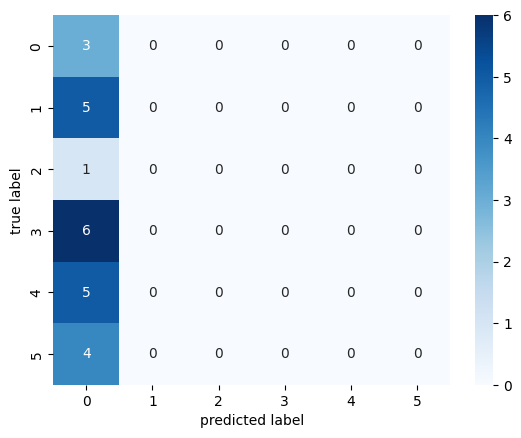

KeyboardInterrupt: 

In [166]:
# It's for testing for training set (Not proper validation, Temporary validation)
tot_test_dataset = torch.utils.data.DataLoader(train_data, batch_size=24, shuffle=True)

def tot_testing(model, tot_test_dataset):
    correct_prediction = 0
    total_prediction = 0

    # Disable gradient updates
    with torch.no_grad():
        model.eval()
        for data in tot_test_dataset:
            print(data)
            # Get the input features and target labels, and put them on the GPU
            mels, labels = data[0].to(device), data[1].to(device)
            labels = labels.cpu()
            #■
            mels = torch.unsqueeze(mels, 1)

            # Normalize the mels
            mels_m, mels_s = mels.mean(), mels.std()
            mels = (mels - mels_m) / mels_s

            # Get predictions
            outputs = model(mels)
            outputs = outputs.cpu()

            # Get the predicted class with the highest score
            _, prediction = torch.max(outputs, 1)

            # Count of predictions that matched the target label
            correct_prediction += (prediction == labels).sum().item()
            total_prediction += prediction.shape[0]
            acc = correct_prediction / total_prediction

            print(classification_report(labels, prediction, digits = 6))
            confmat = confusion_matrix(y_true=labels, y_pred=prediction)
            sns.heatmap(confmat, annot = True, fmt ='d',cmap = 'Blues')
            plt.xlabel('predicted label')
            plt.ylabel('true label')
            plt.show()

    print(f'Accuracy: {acc:.6f}, Total items: {total_prediction}')

tot_testing(Mel_classifier, tot_test_dataset)
